## Import 

In [1]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
import numpy as np

## Telechargement du ZIP

In [2]:
from modules.loader import Loader

loader = Loader(
    "https://stdatalake010.blob.core.windows.net/public/cifar-100.zip",
    '../datas/ZIP/',
    extraction_target='../datas/RAW/'
)
loader.ensure_data_loaded()

Le fichier ZIP existe déjà


## Extraction d'un jeu de donnees

In [3]:
from modules.splitting import Splitting

labels_array = ['apple', 'bee']

TRAIN_DATA_DIR = Splitting.copie_dossiers(
    '../datas/RAW/train',
    labels_array,
    500,
    explorer=False
)

print(TRAIN_DATA_DIR)

Le dossier c:\Users\utilisateur\Documents\datas\RAW\train_apple_bee existe déjà !
c:\Users\utilisateur\Documents\datas\RAW\train_apple_bee


## Chargement des images

In [4]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

# Taille d'image
TRAIN_IMAGE_SIZE = 32
# NB d'images envoyées à la fois
TRAIN_BATCH_SIZE = 64

train_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training')
 
validation_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR, # same directory as training data
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## Creation du modele

- convolution
- dense
- pooling

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_uniform', padding='same'))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_uniform', padding='same'))

#Toujours à la fin
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dense (Dense)                (None, 16, 16, 64)        2112      
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
dense_1 (Dense)              (None, 16, 16, 128)       8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es_callback = EarlyStopping(monitor='val_loss', patience=15)
training = model.fit(train_generator, epochs=40, callbacks=[es_callback], validation_data=validation_generator, shuffle=False)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 4 steps
Epoch 1/40
13/13 [==============================] - 12s 892ms/step - loss: 124.3265 - accuracy: 0.5325 - val_loss: 6.2042 - val_accuracy: 0.5700
Epoch 2/40
13/13 [==============================] - 8s 628ms/step - loss: 6.2363 - accuracy: 0.6500 - val_loss: 9.1291 - val_accuracy: 0.6050
Epoch 3/40
13/13 [==============================] - 8s 592ms/step - loss: 1.9296 - accuracy: 0.7525 - val_loss: 2.6869 - val_accuracy: 0.6950
Epoch 4/40
13/13 [==============================] - 7s 575ms/step - loss: 0.9769 - accuracy: 0.8150 - val_loss: 1.7584 - val_accuracy: 0.6950
Epoch 5/40
13/13 [==============================] - 8s 625ms/step - loss: 0.5531 - accuracy: 0.8400 - val_loss: 1.3203 - val_accuracy: 0.7150
Epoch 6/40
13/13 [==============================] - 10s 806ms/step - loss: 0.5416 - accuracy: 0.8400 - val_loss: 2.1532 - val_accuracy: 0.6750
Epoch 7/40
13/13 [==============================] - 1

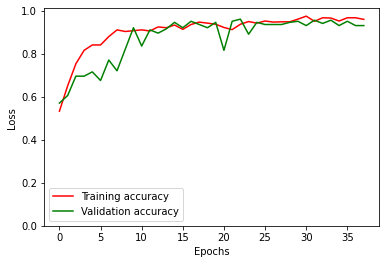

In [7]:
plt.plot(training.history['accuracy'], color='red', label='Training accuracy')
plt.plot(training.history['val_accuracy'],  color='green', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.ylim((0,1.01))

plt.show()

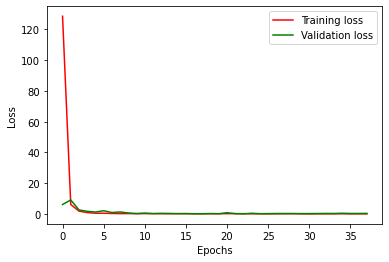

In [8]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

## Sauvegarde du modele

In [9]:
model_name = 'model_apple_bee.h5'

model.save(model_name)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dense (Dense)                (None, 16, 16, 64)        2112      
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
dense_1 (Dense)              (None, 16, 16, 128)       8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0

## Affichage des couches du modele

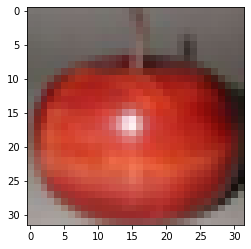

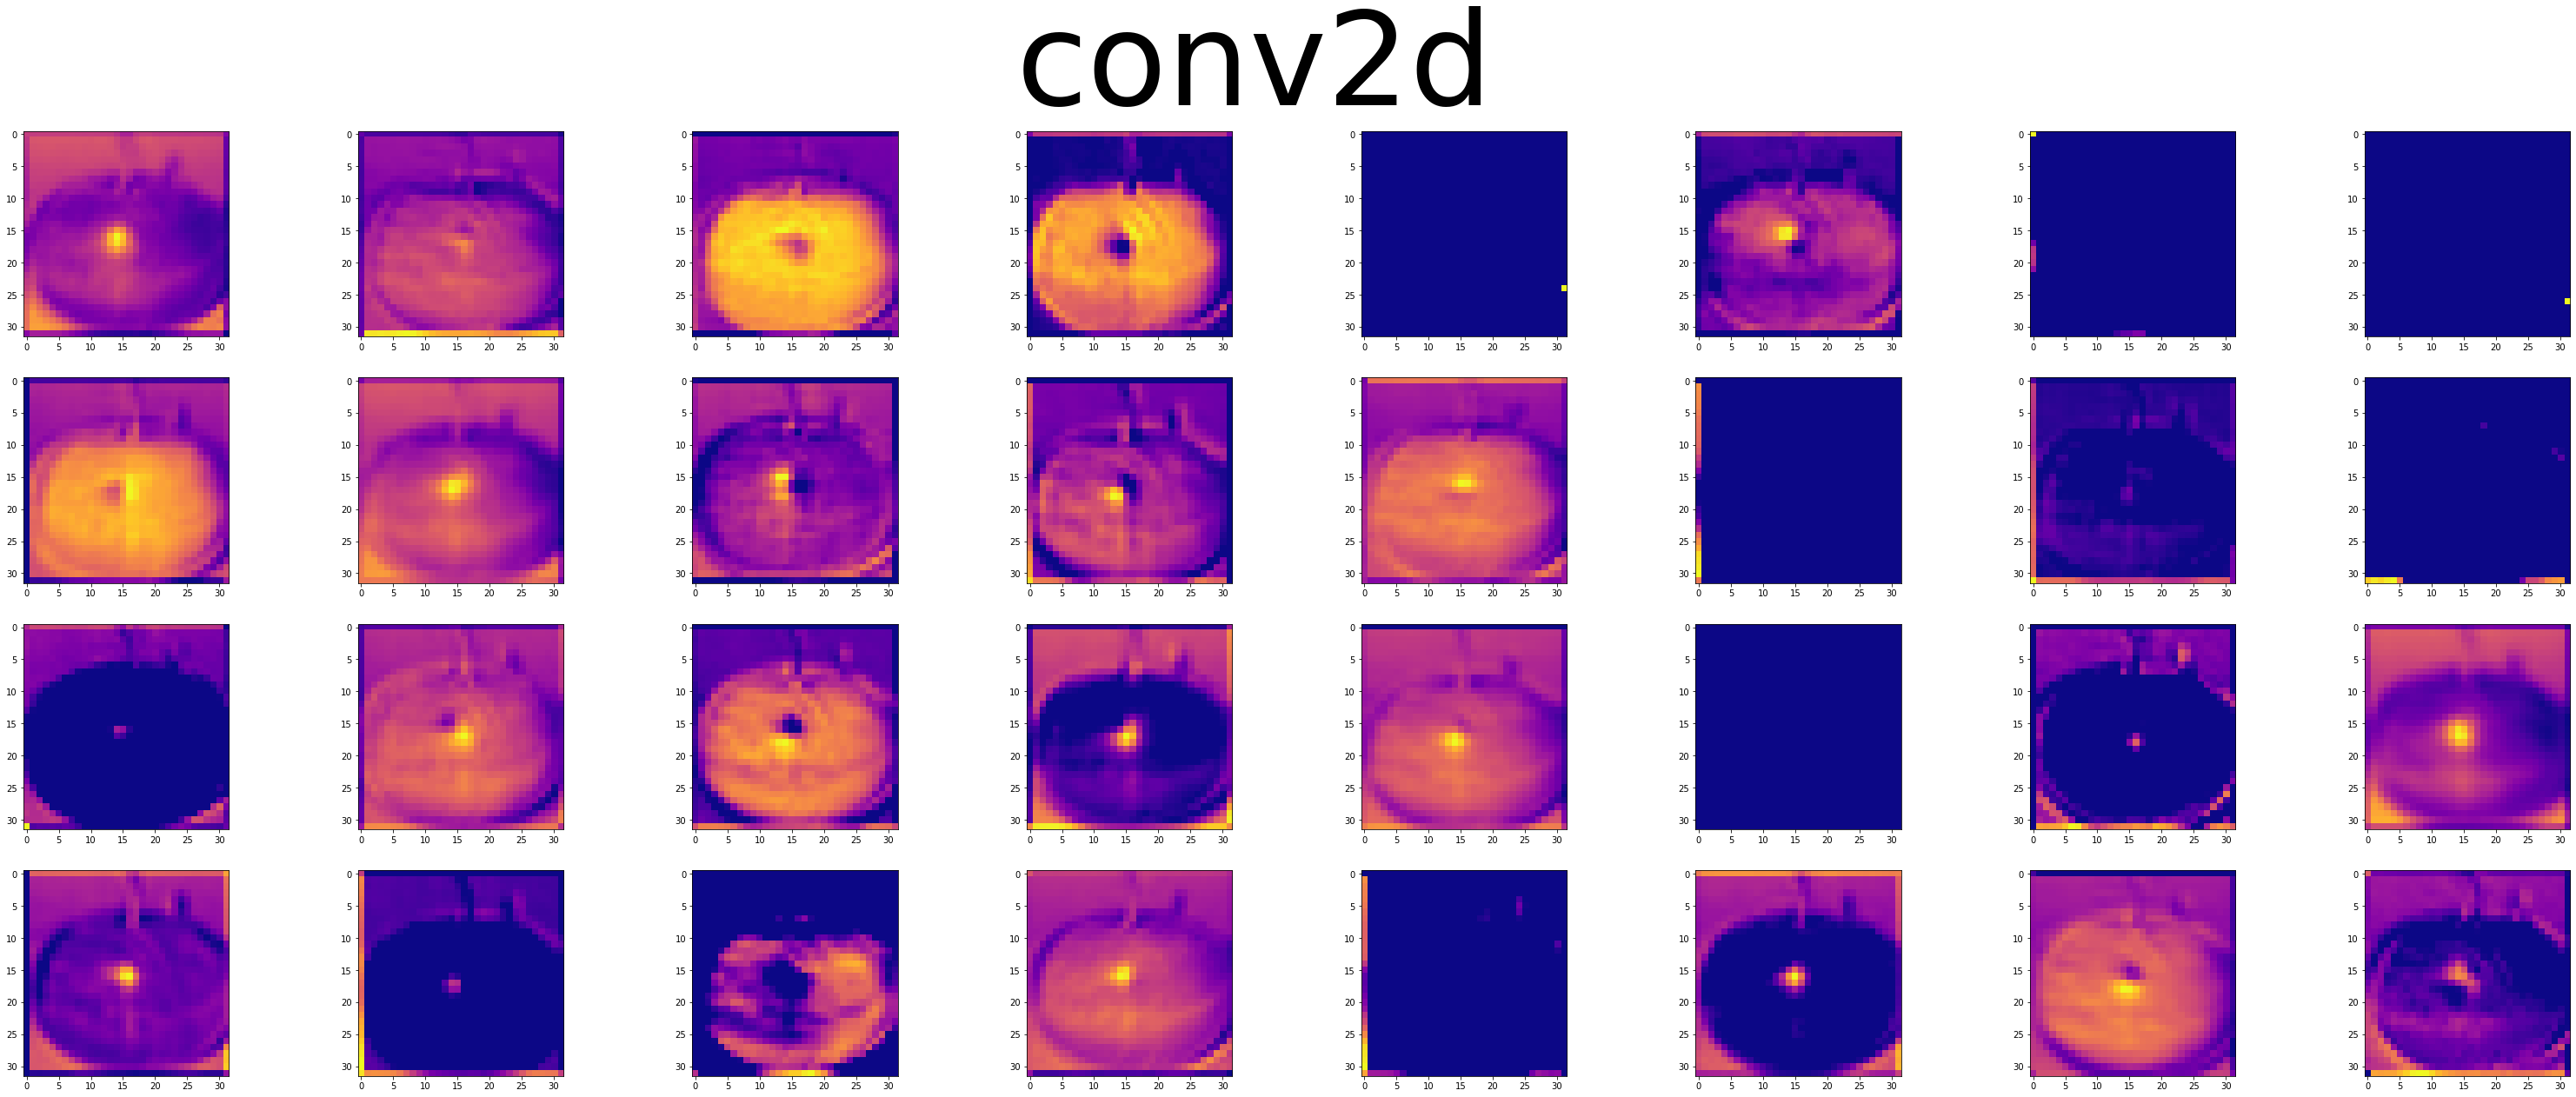

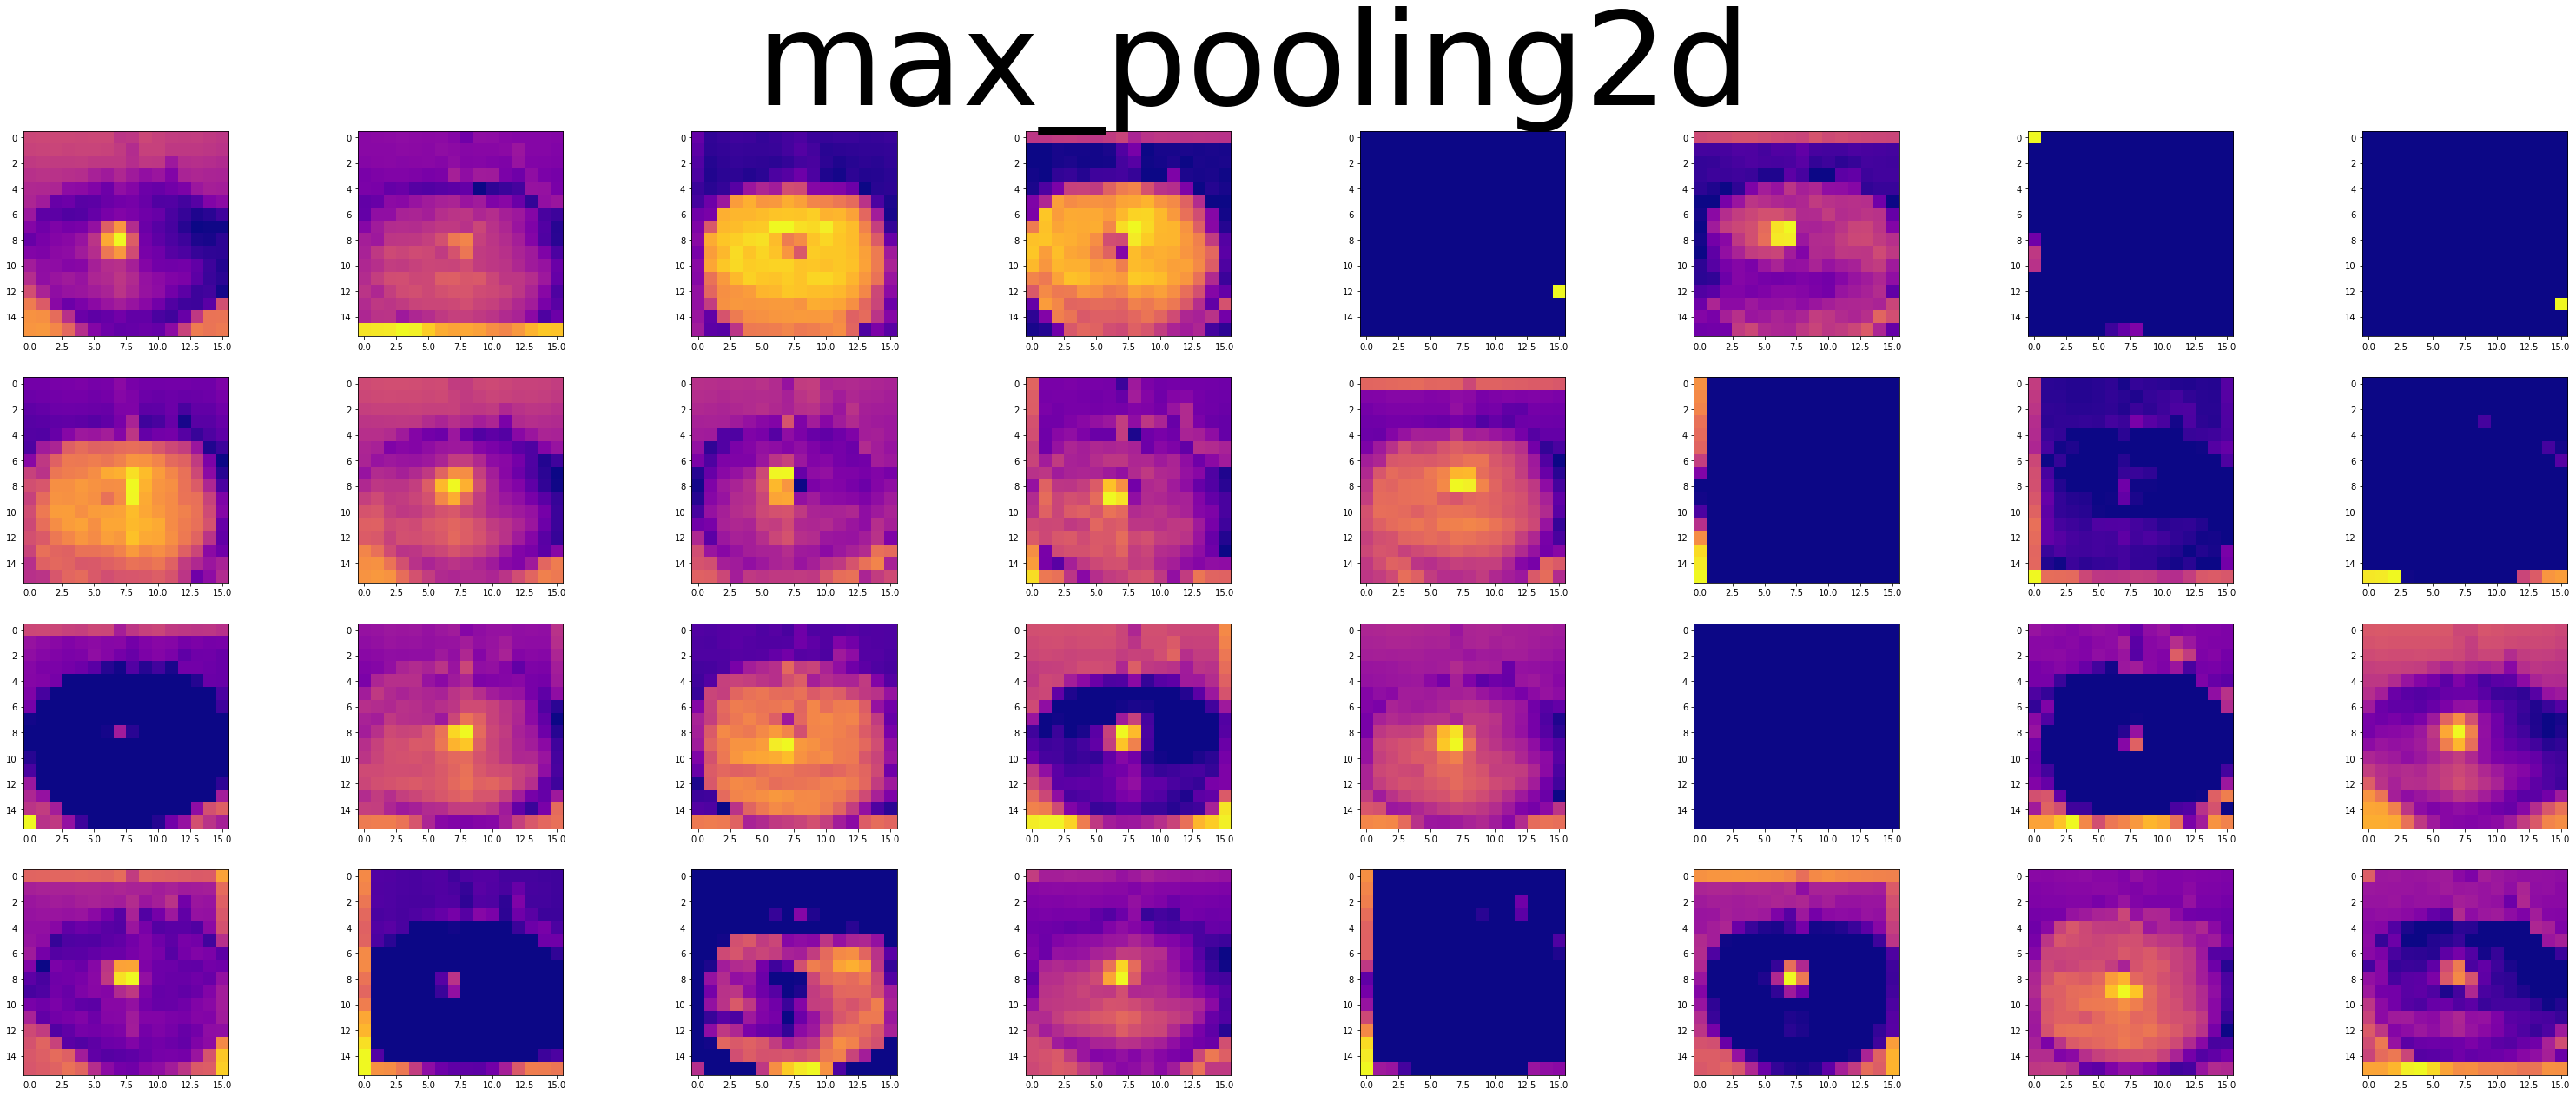

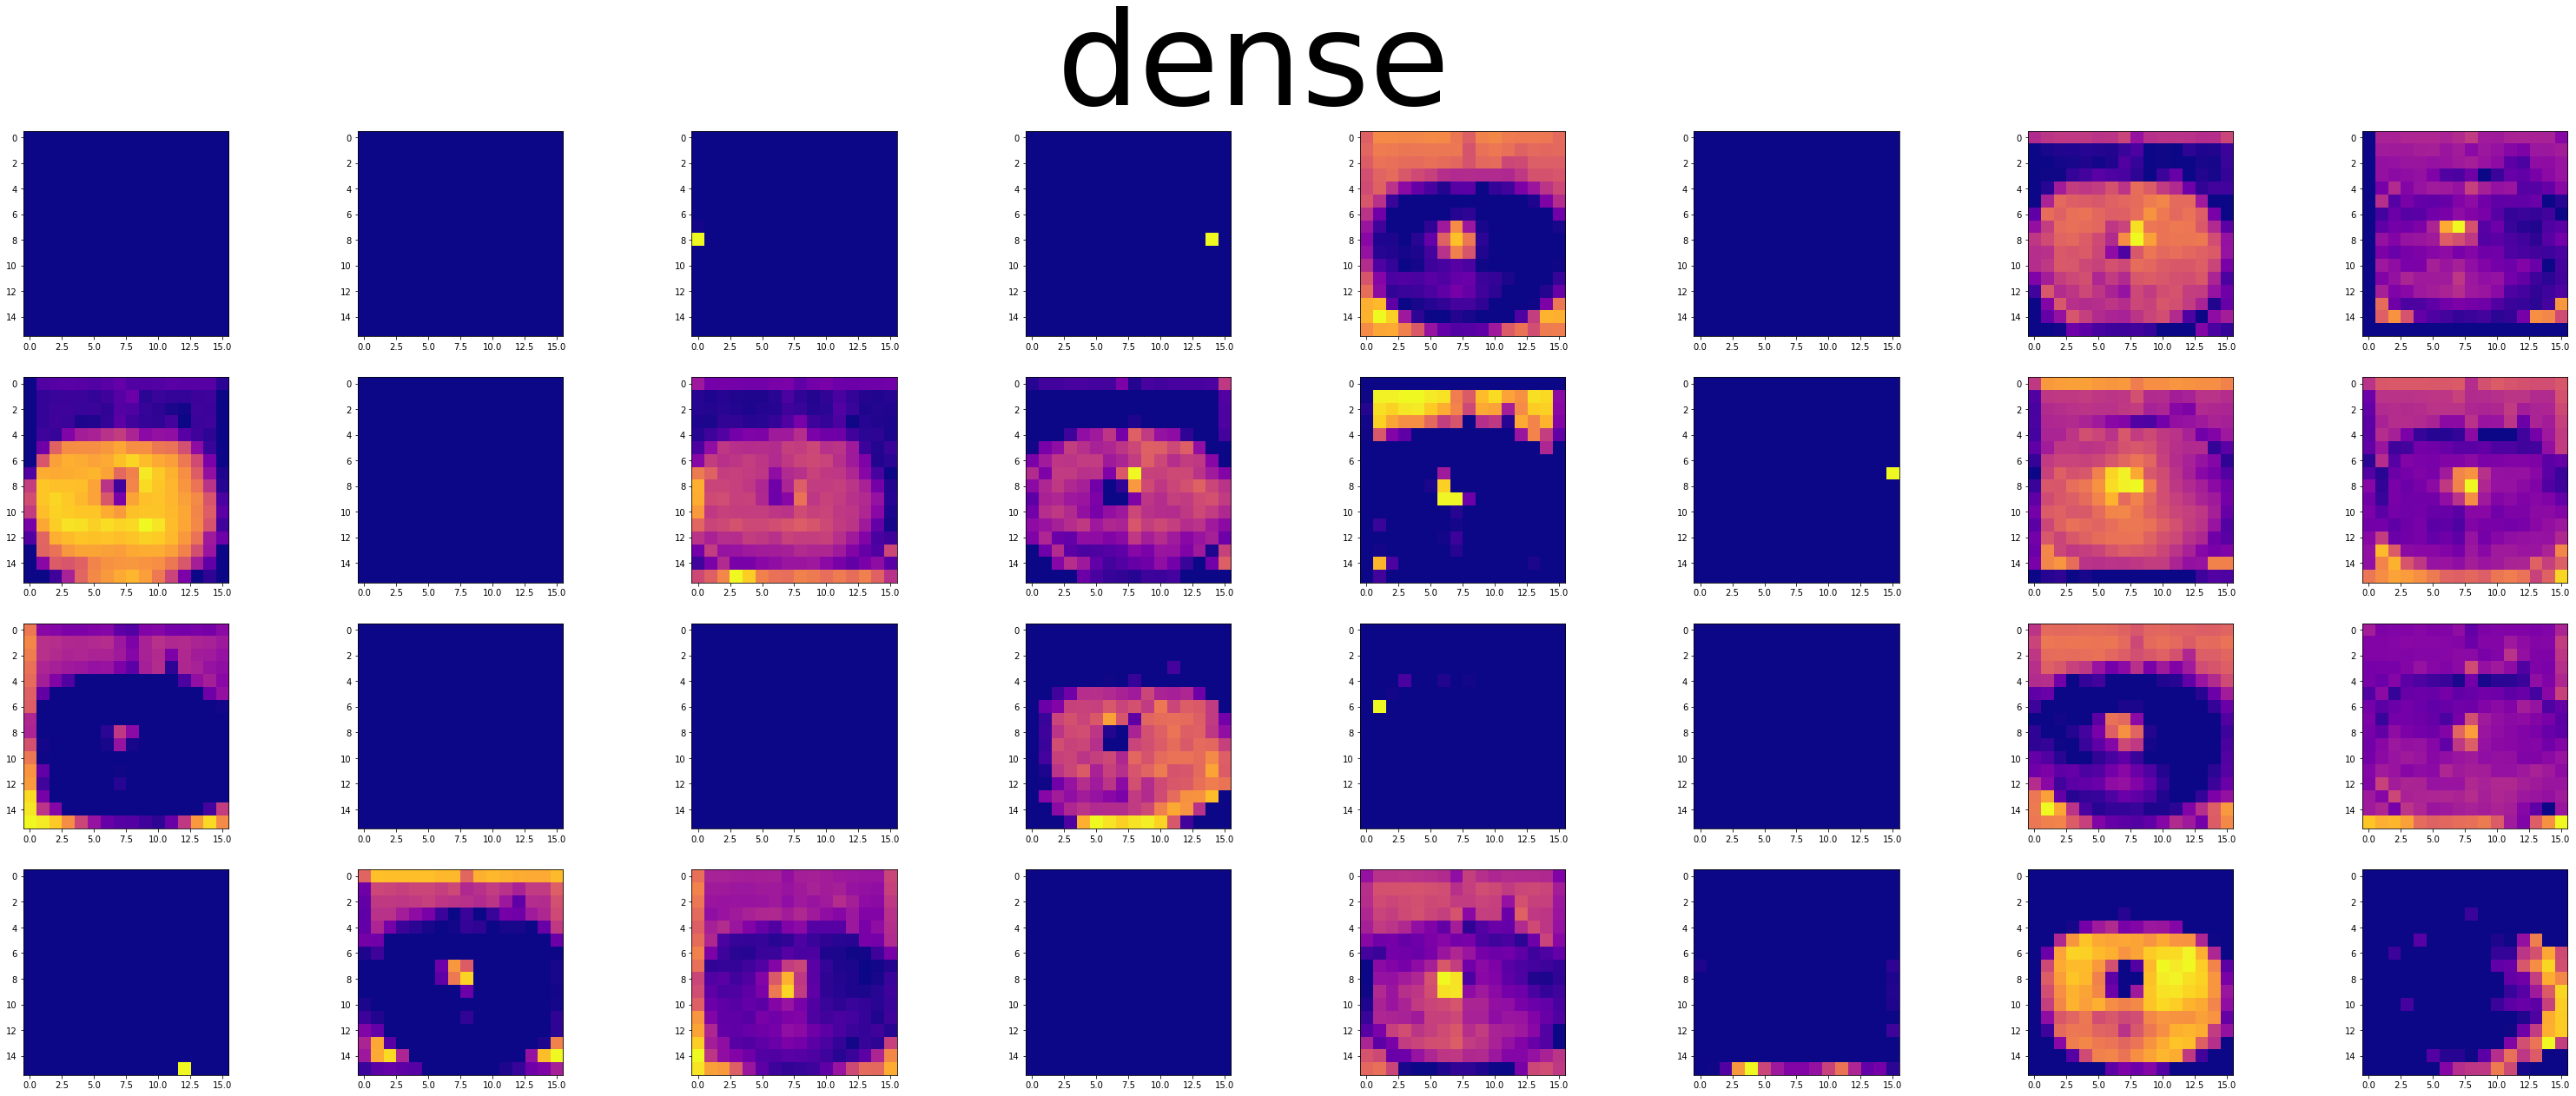

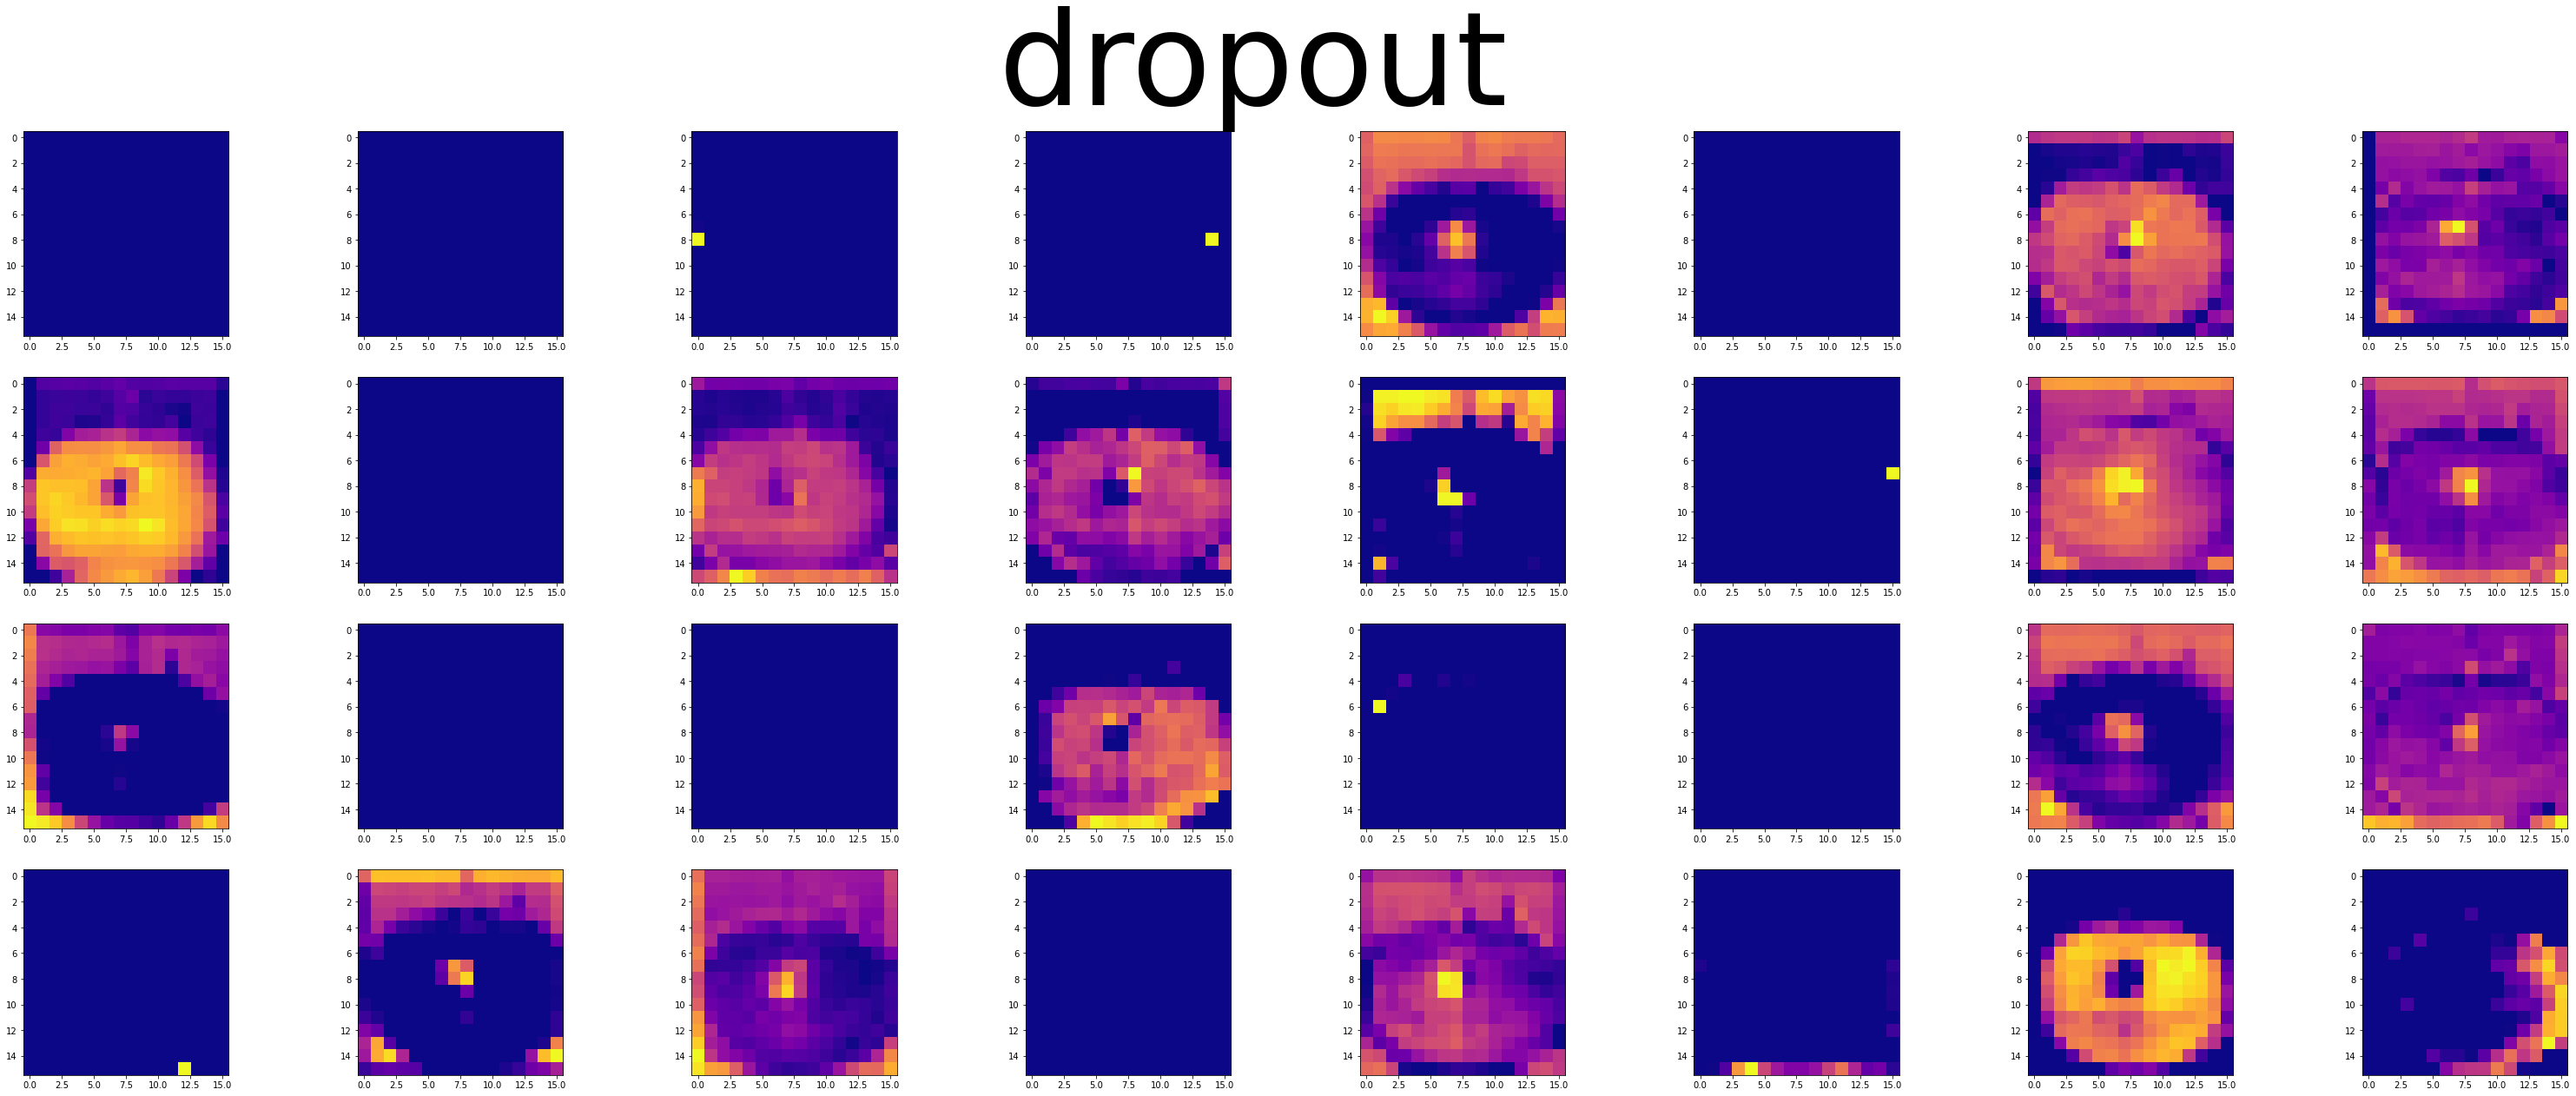

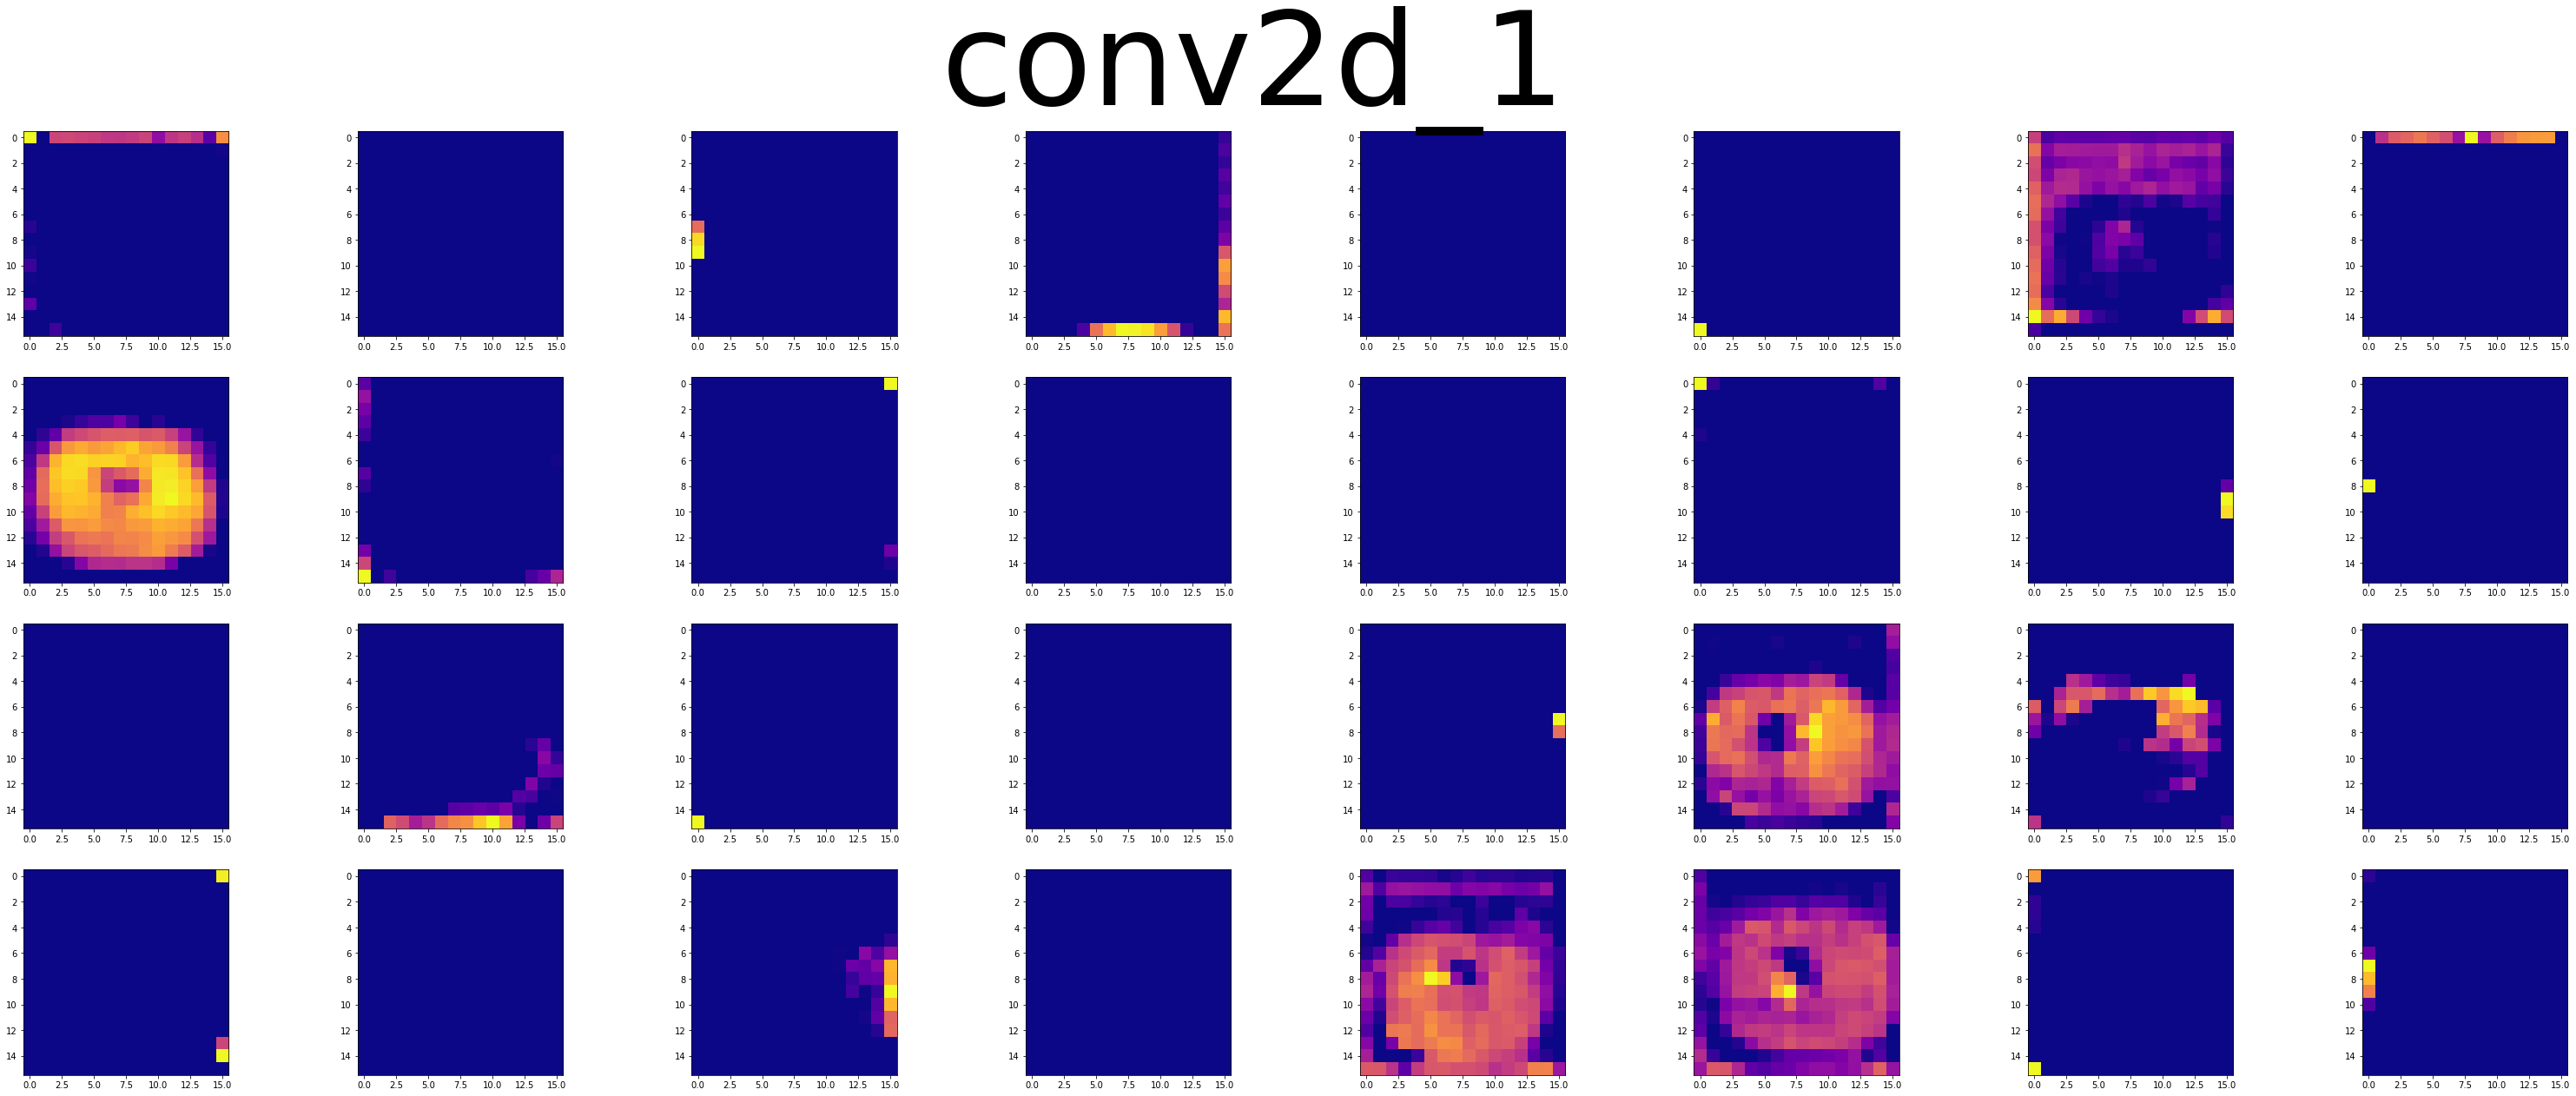

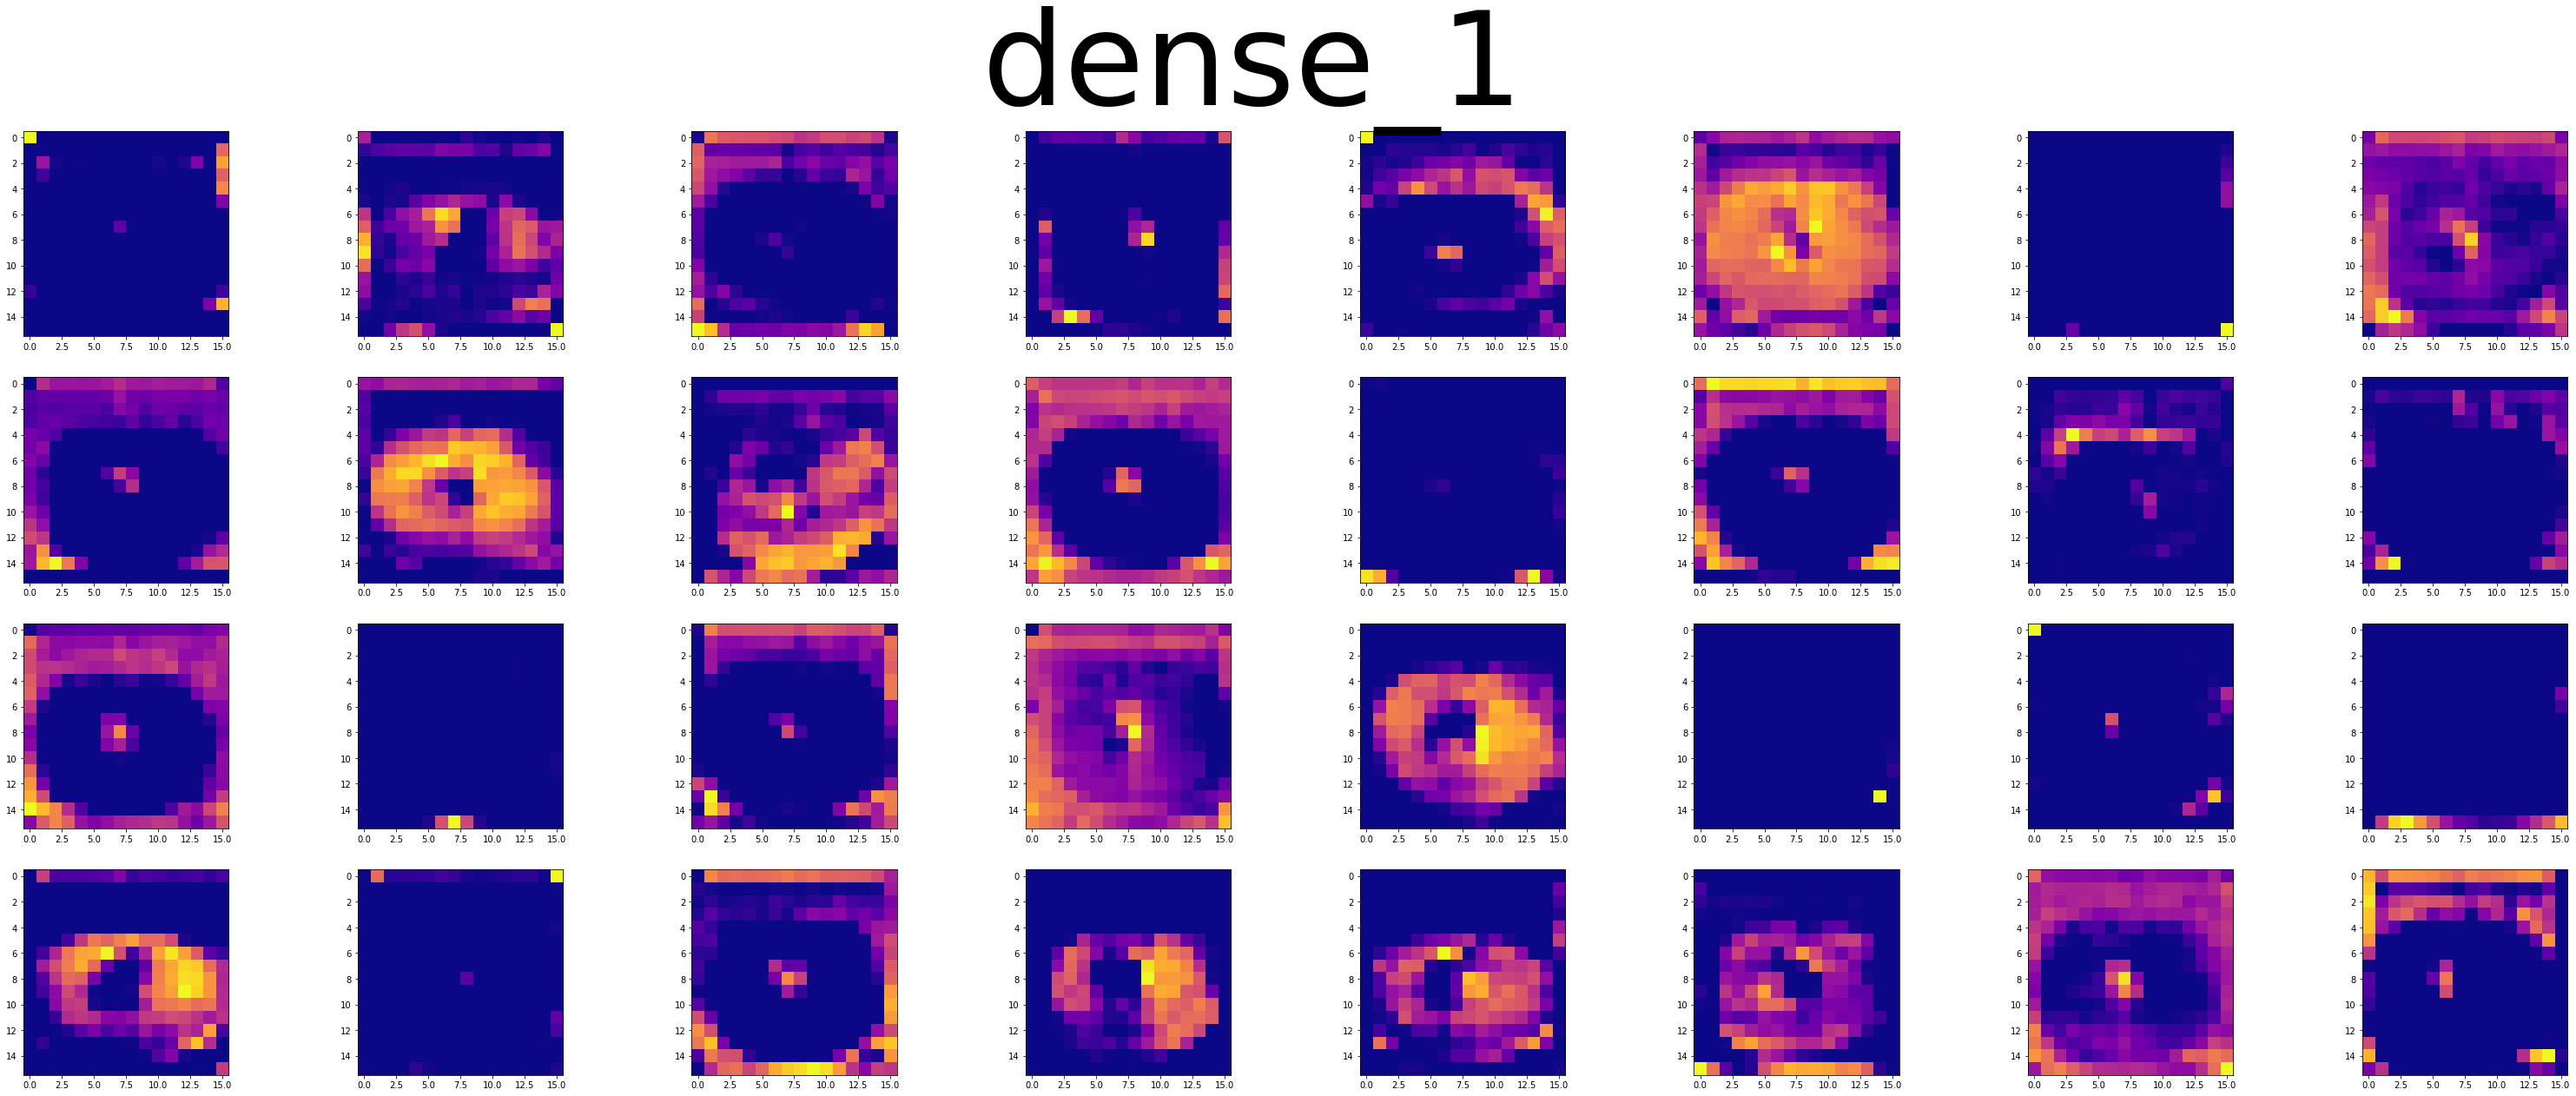

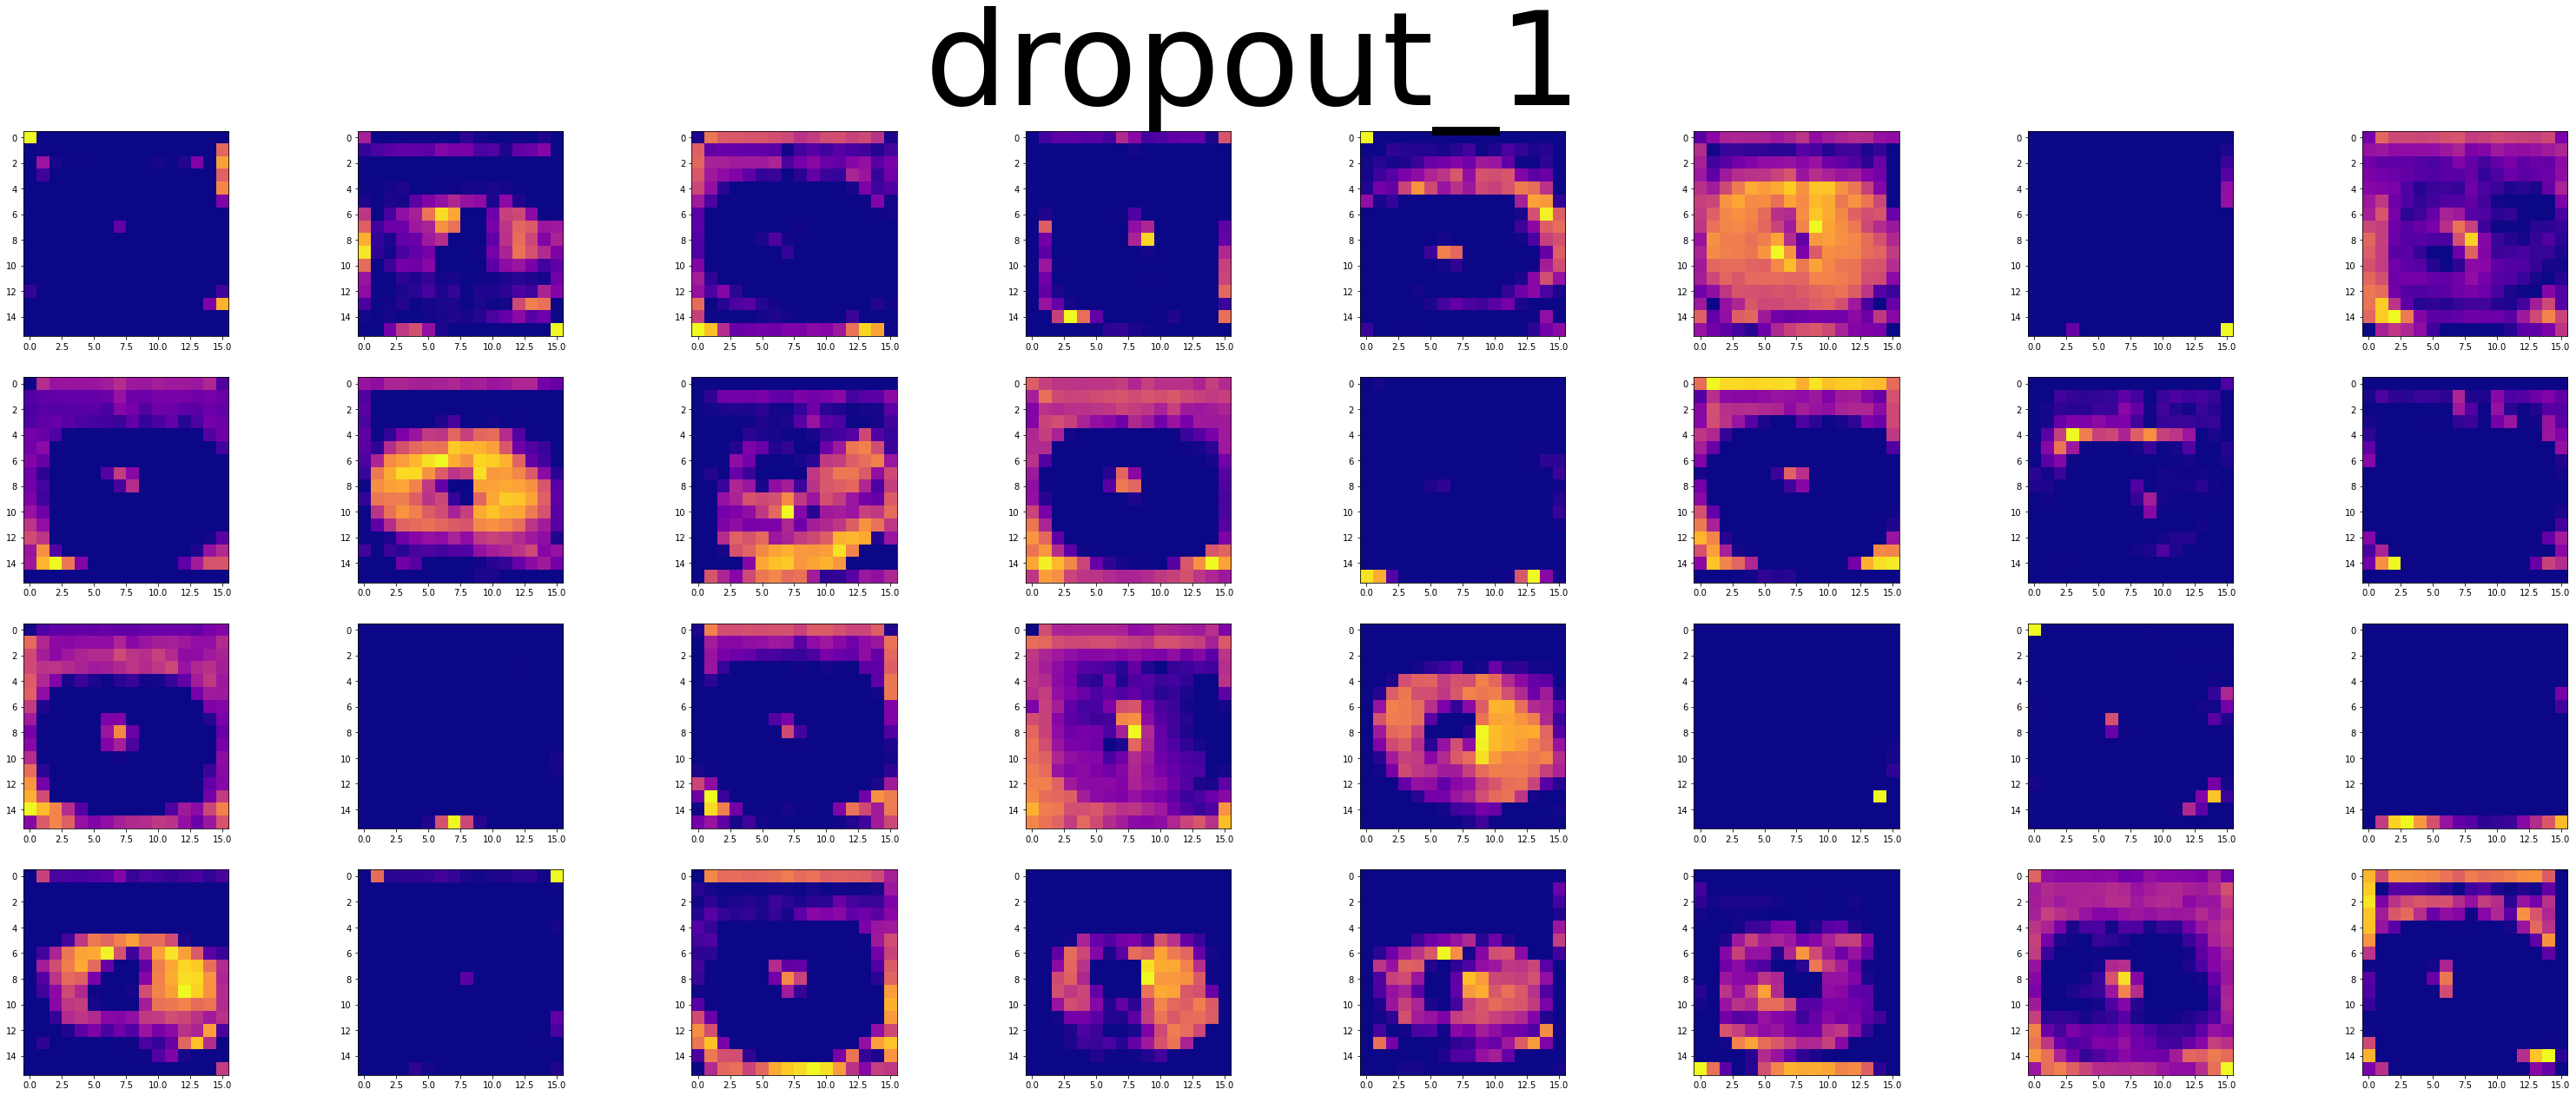

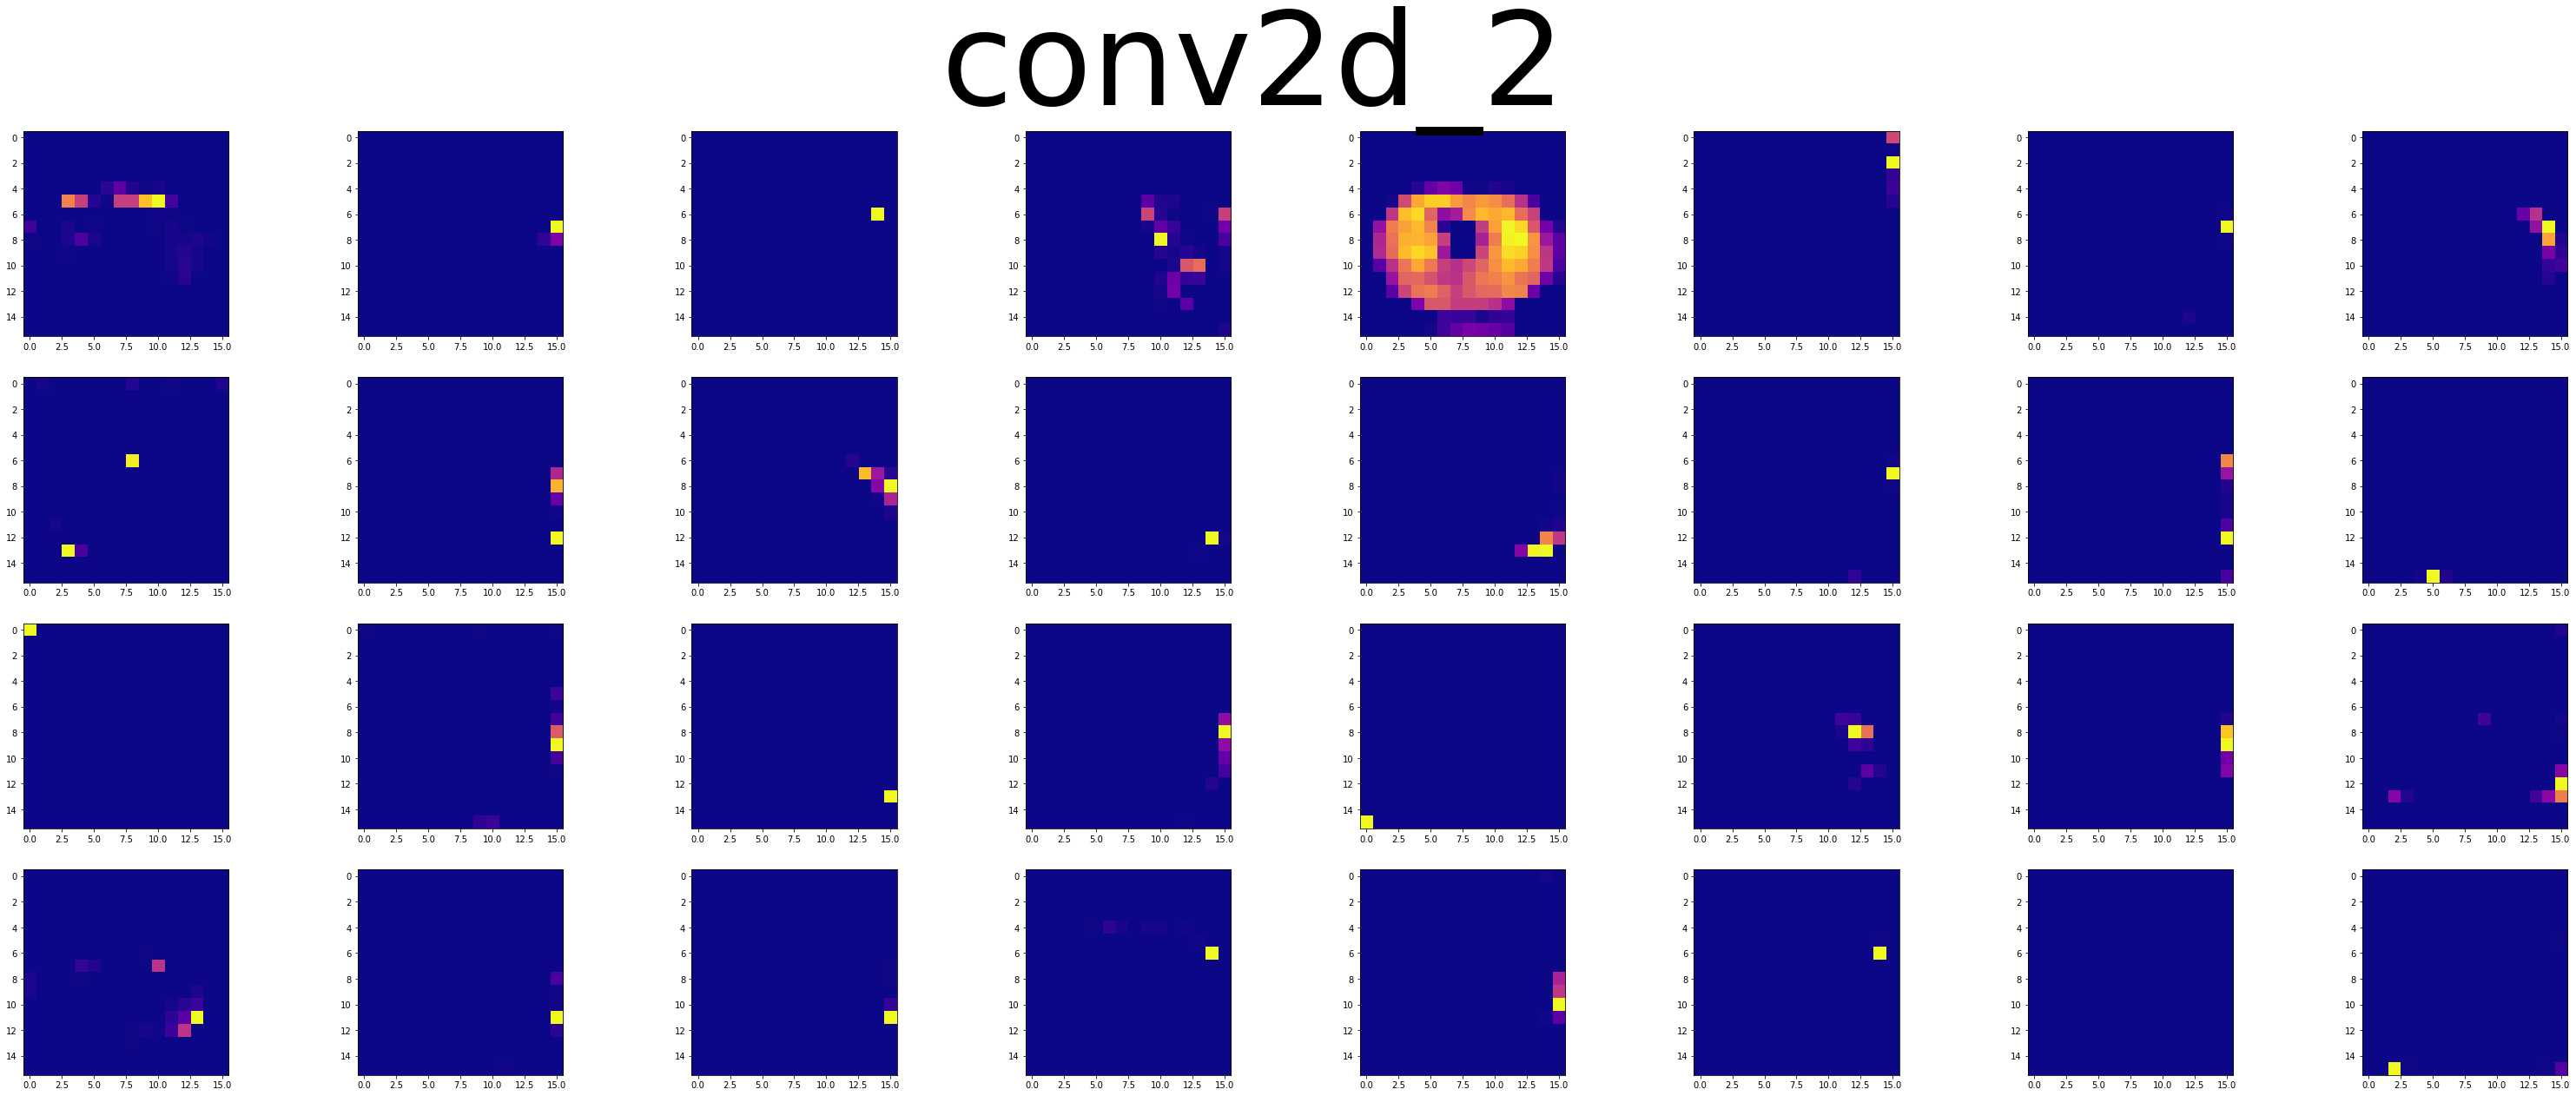

In [10]:
from modules.observation_modele import plot_layer

img = "../datas/RAW/train/apple/0020.png"
plt.imshow(plt.imread(img))

plot_layer(model, img, range(8))

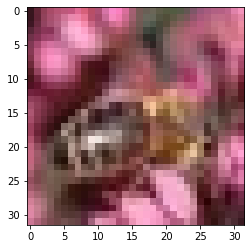

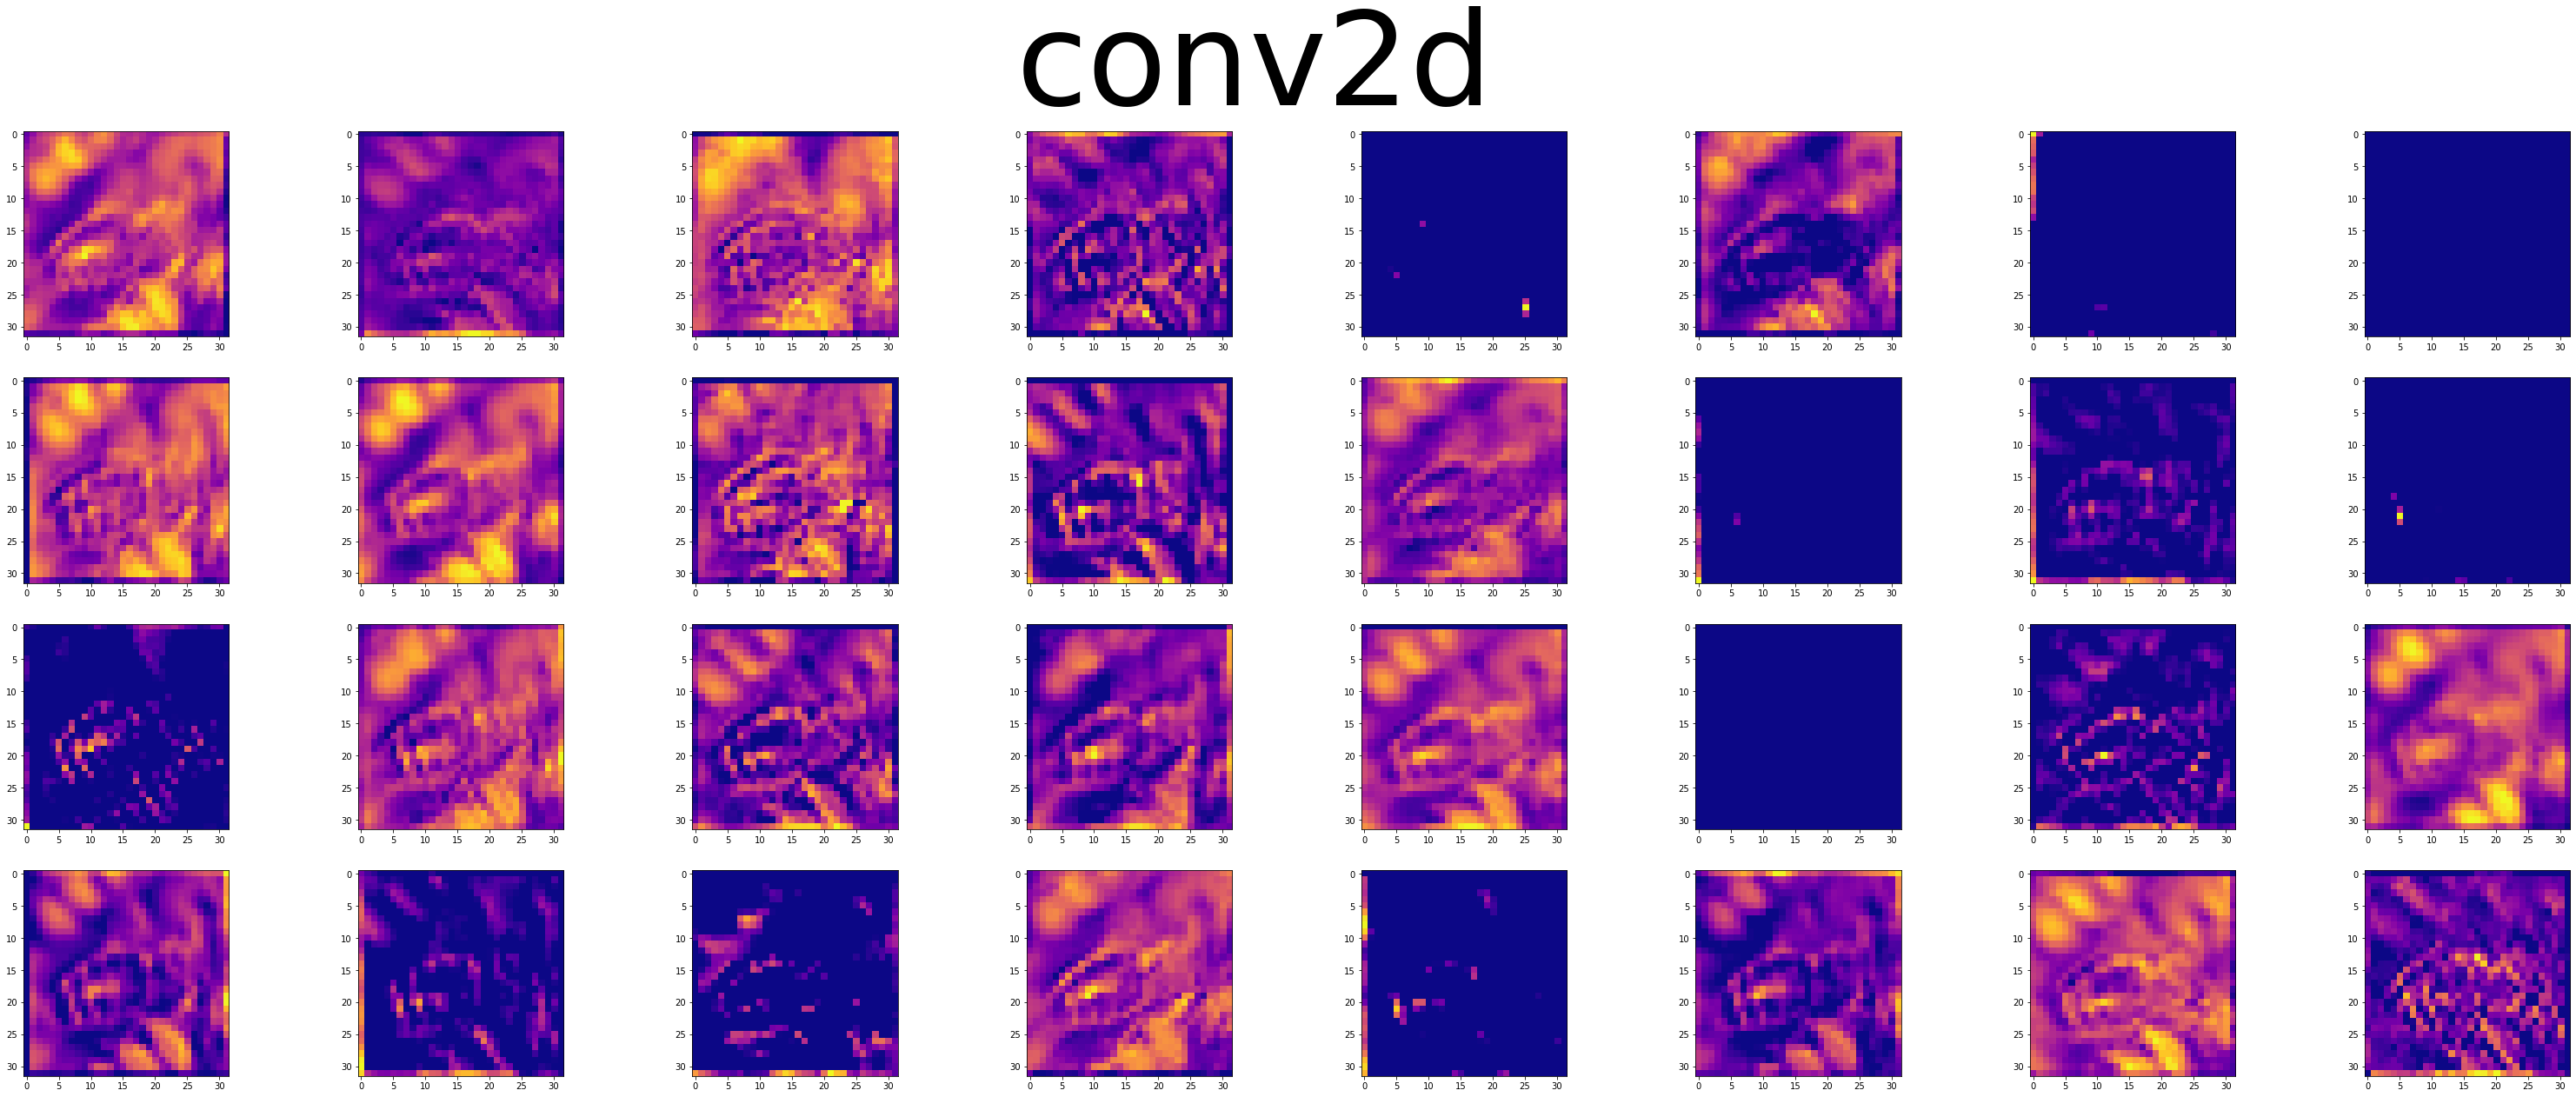

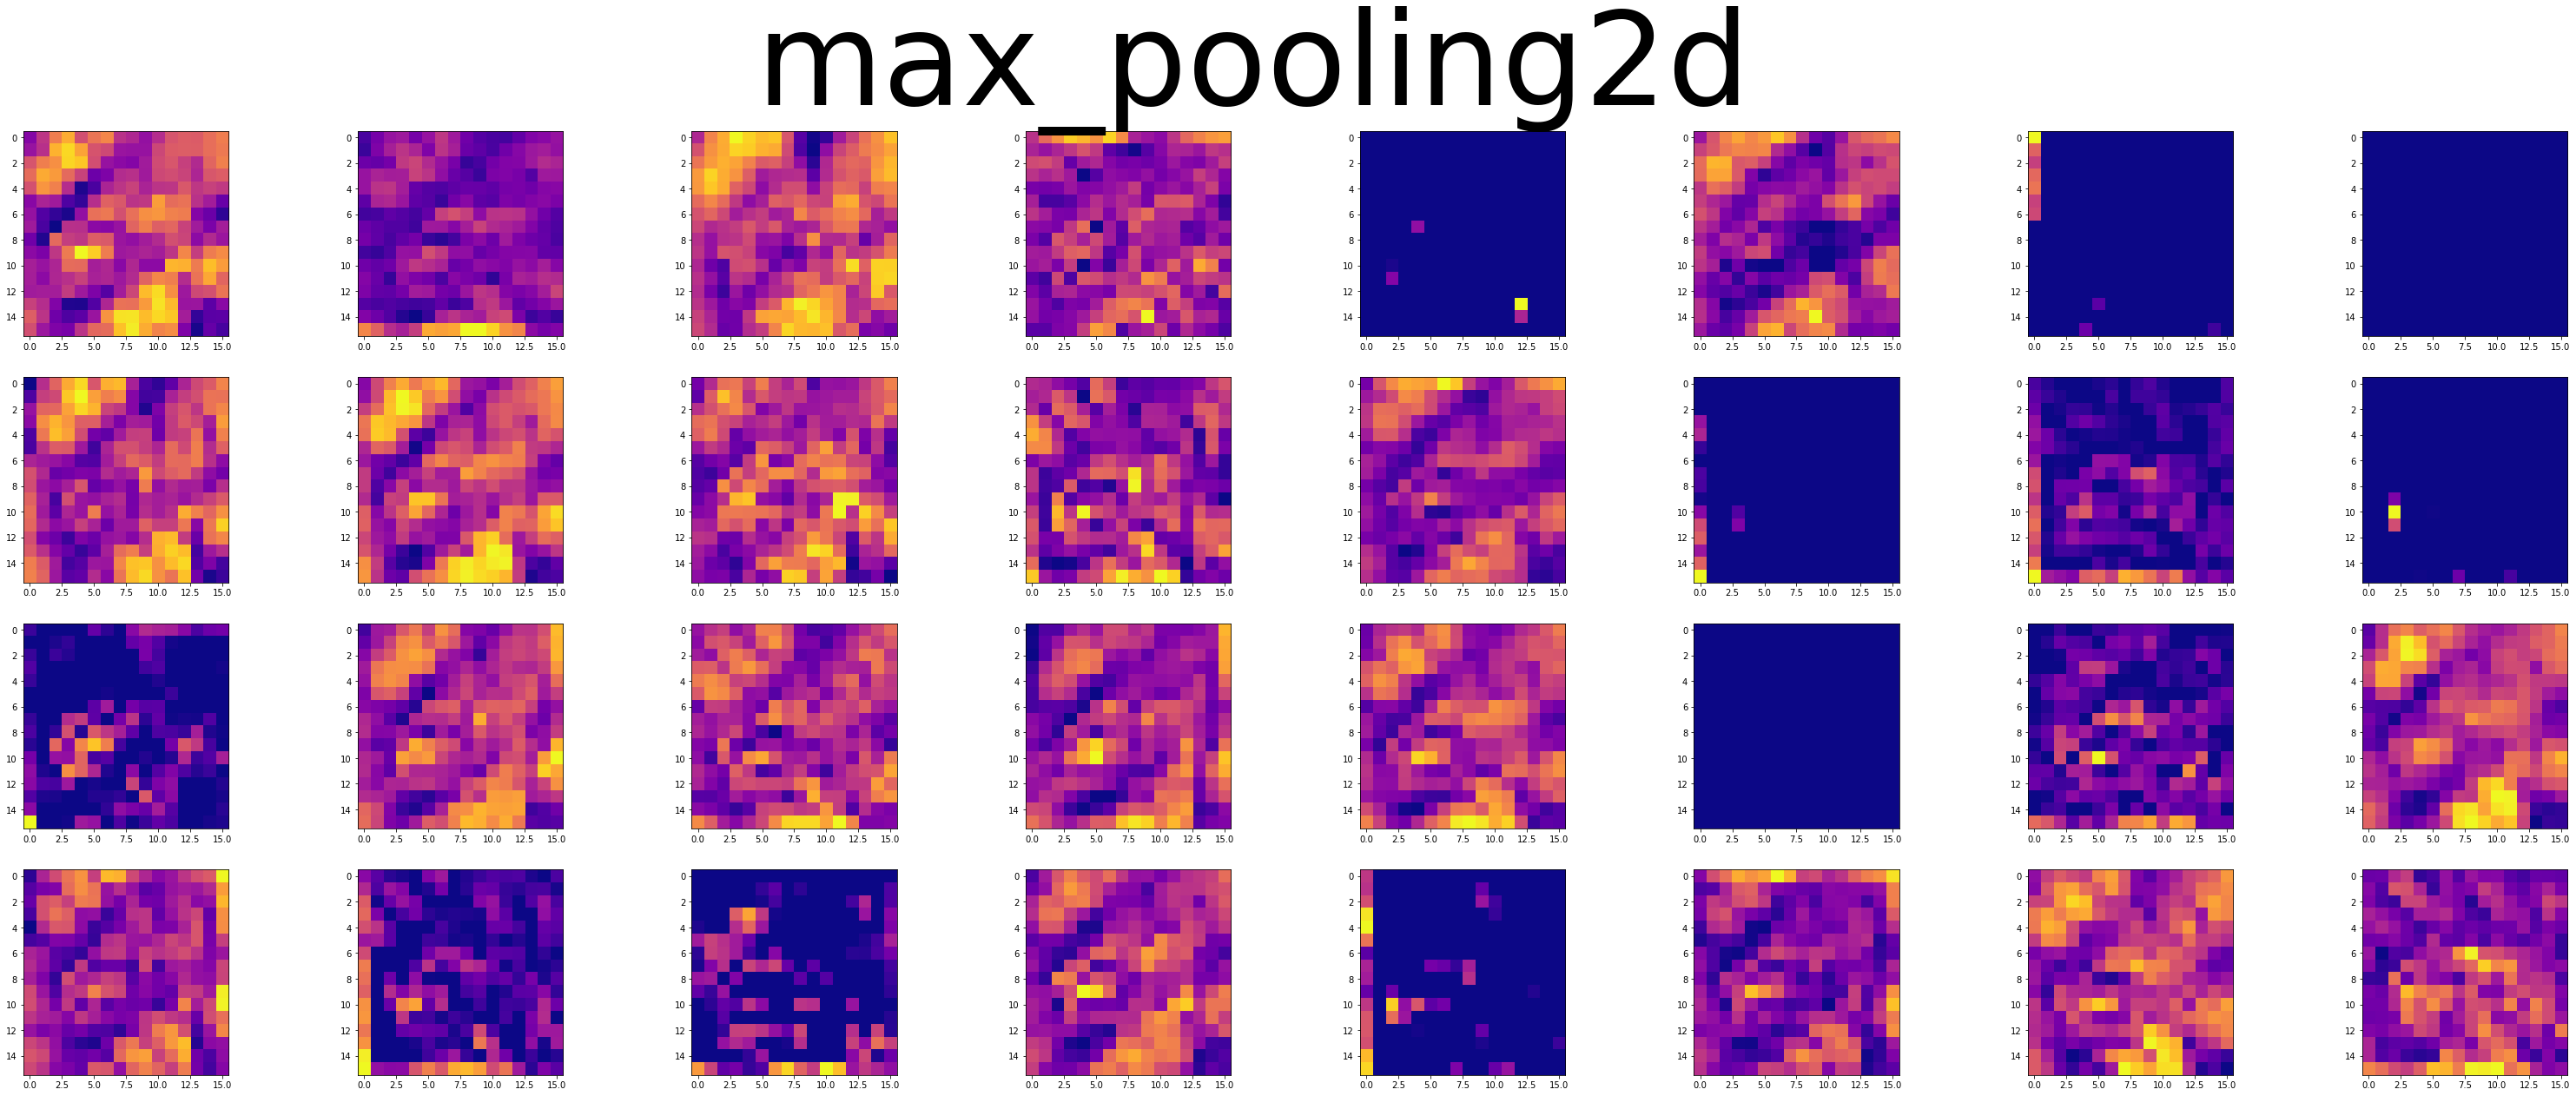

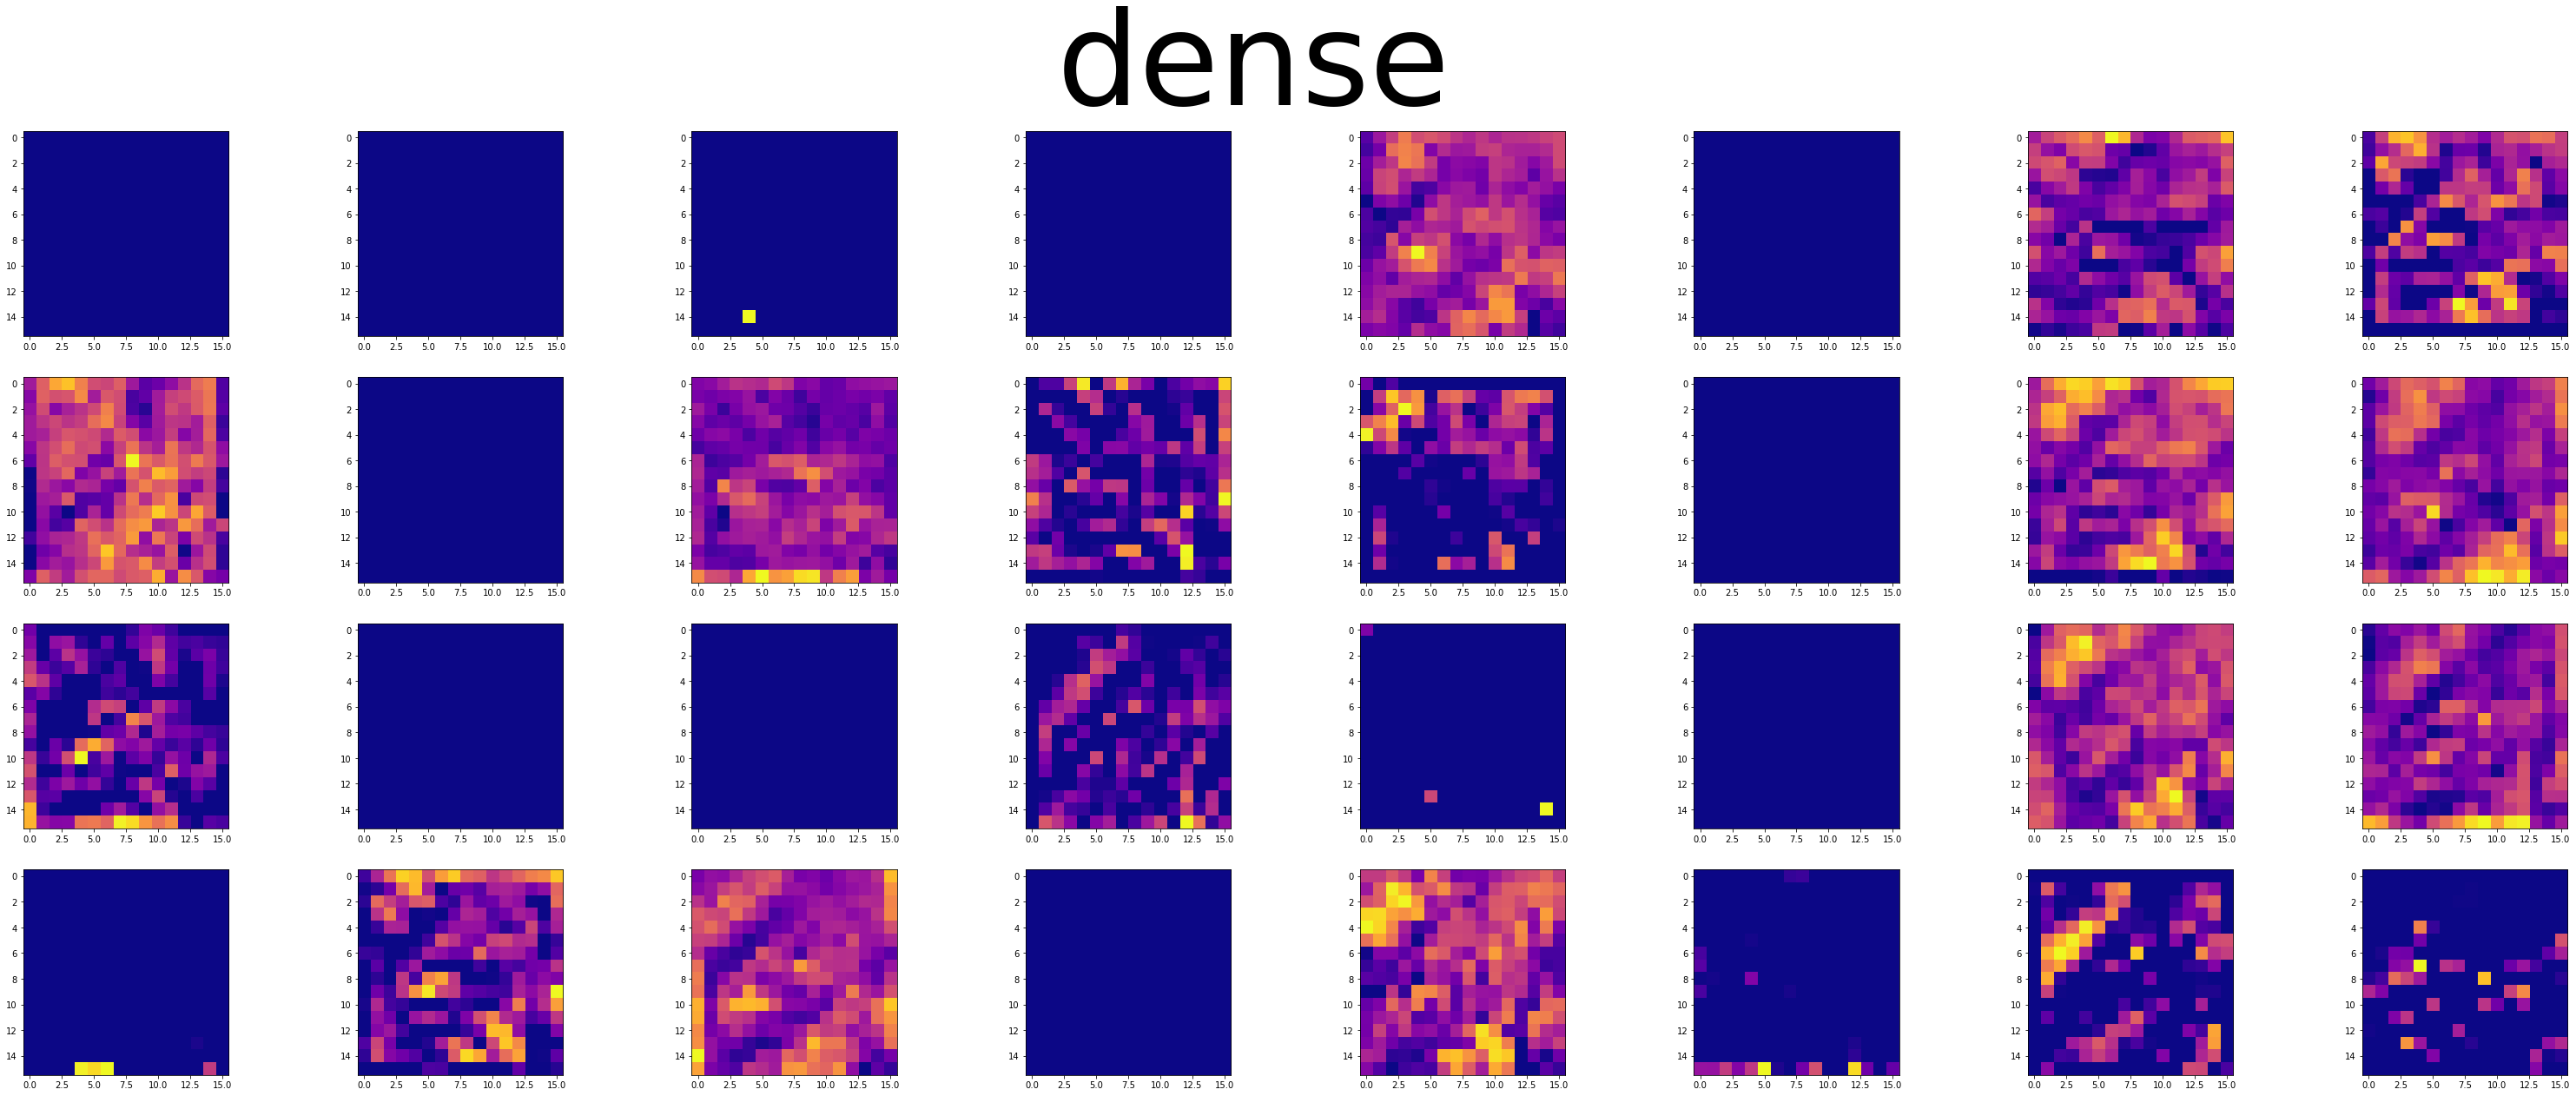

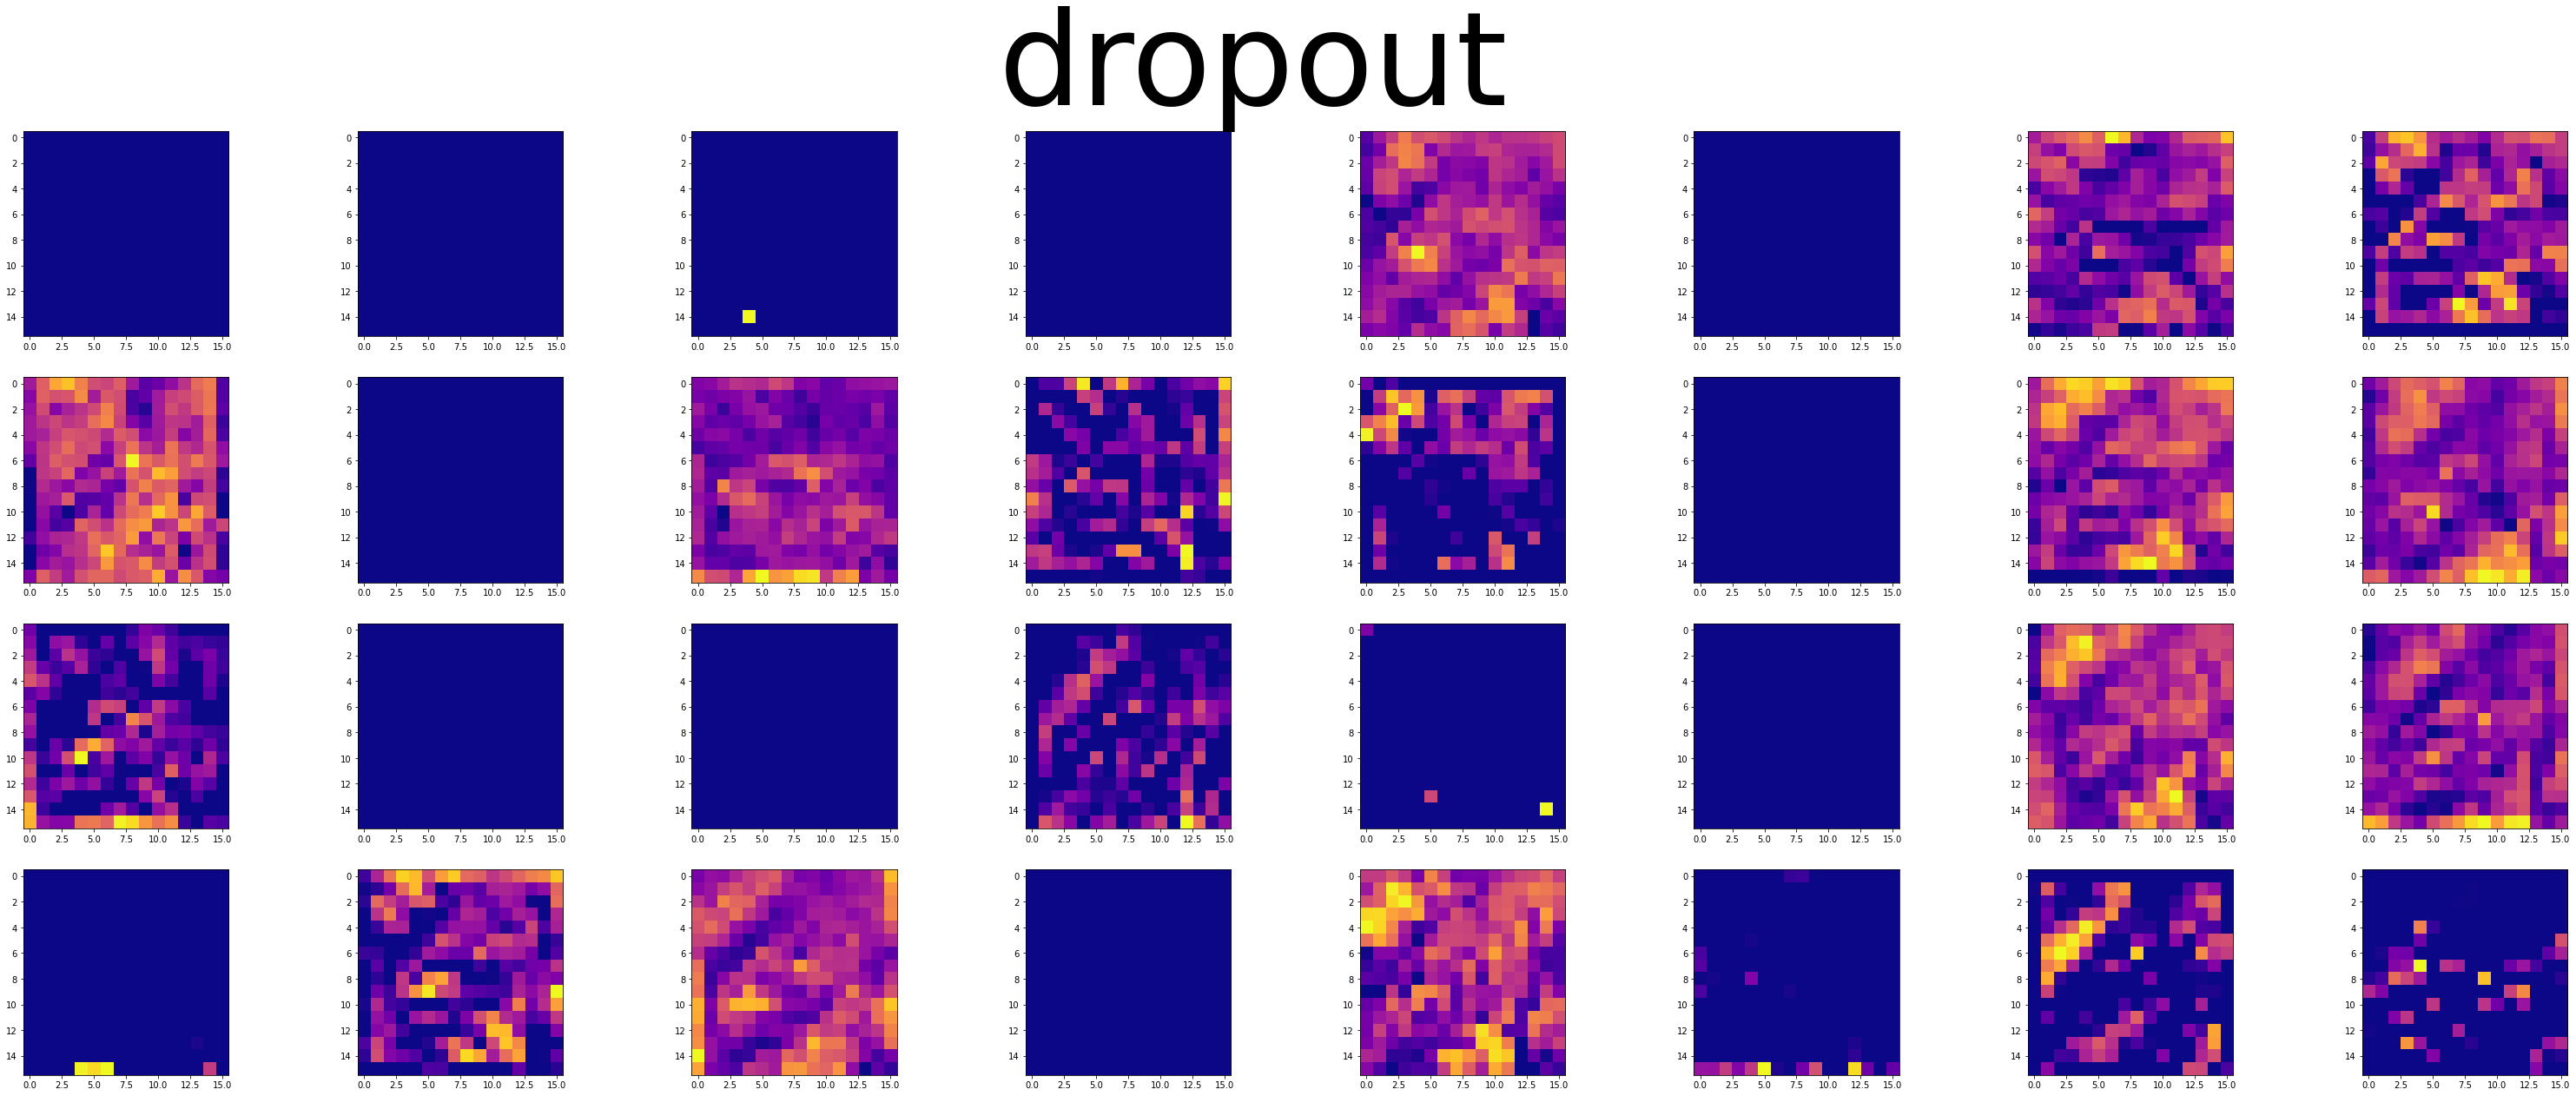

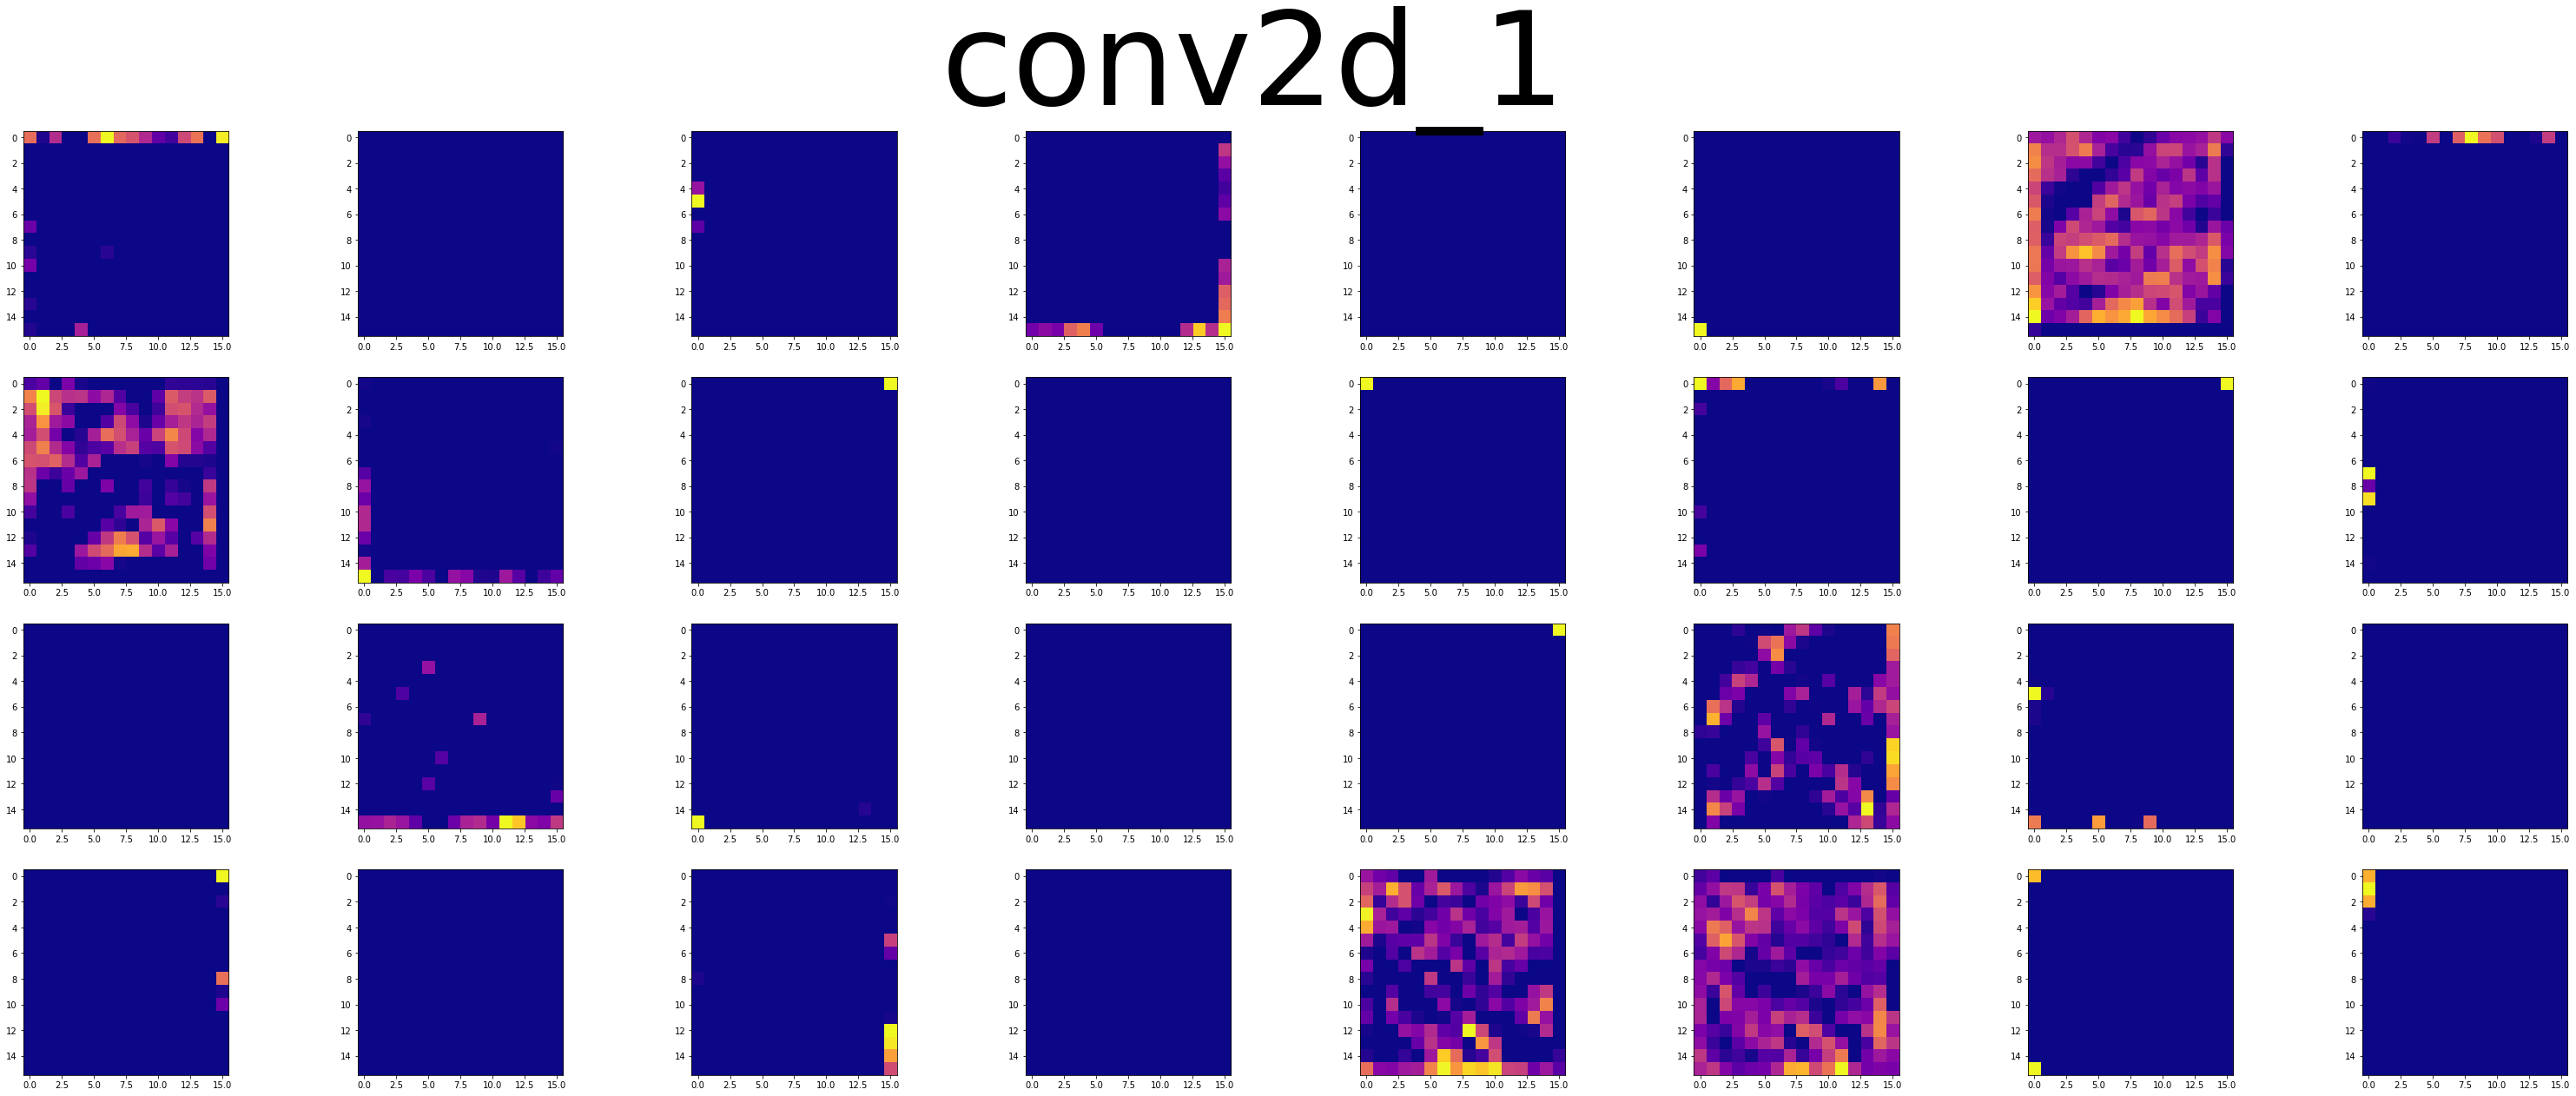

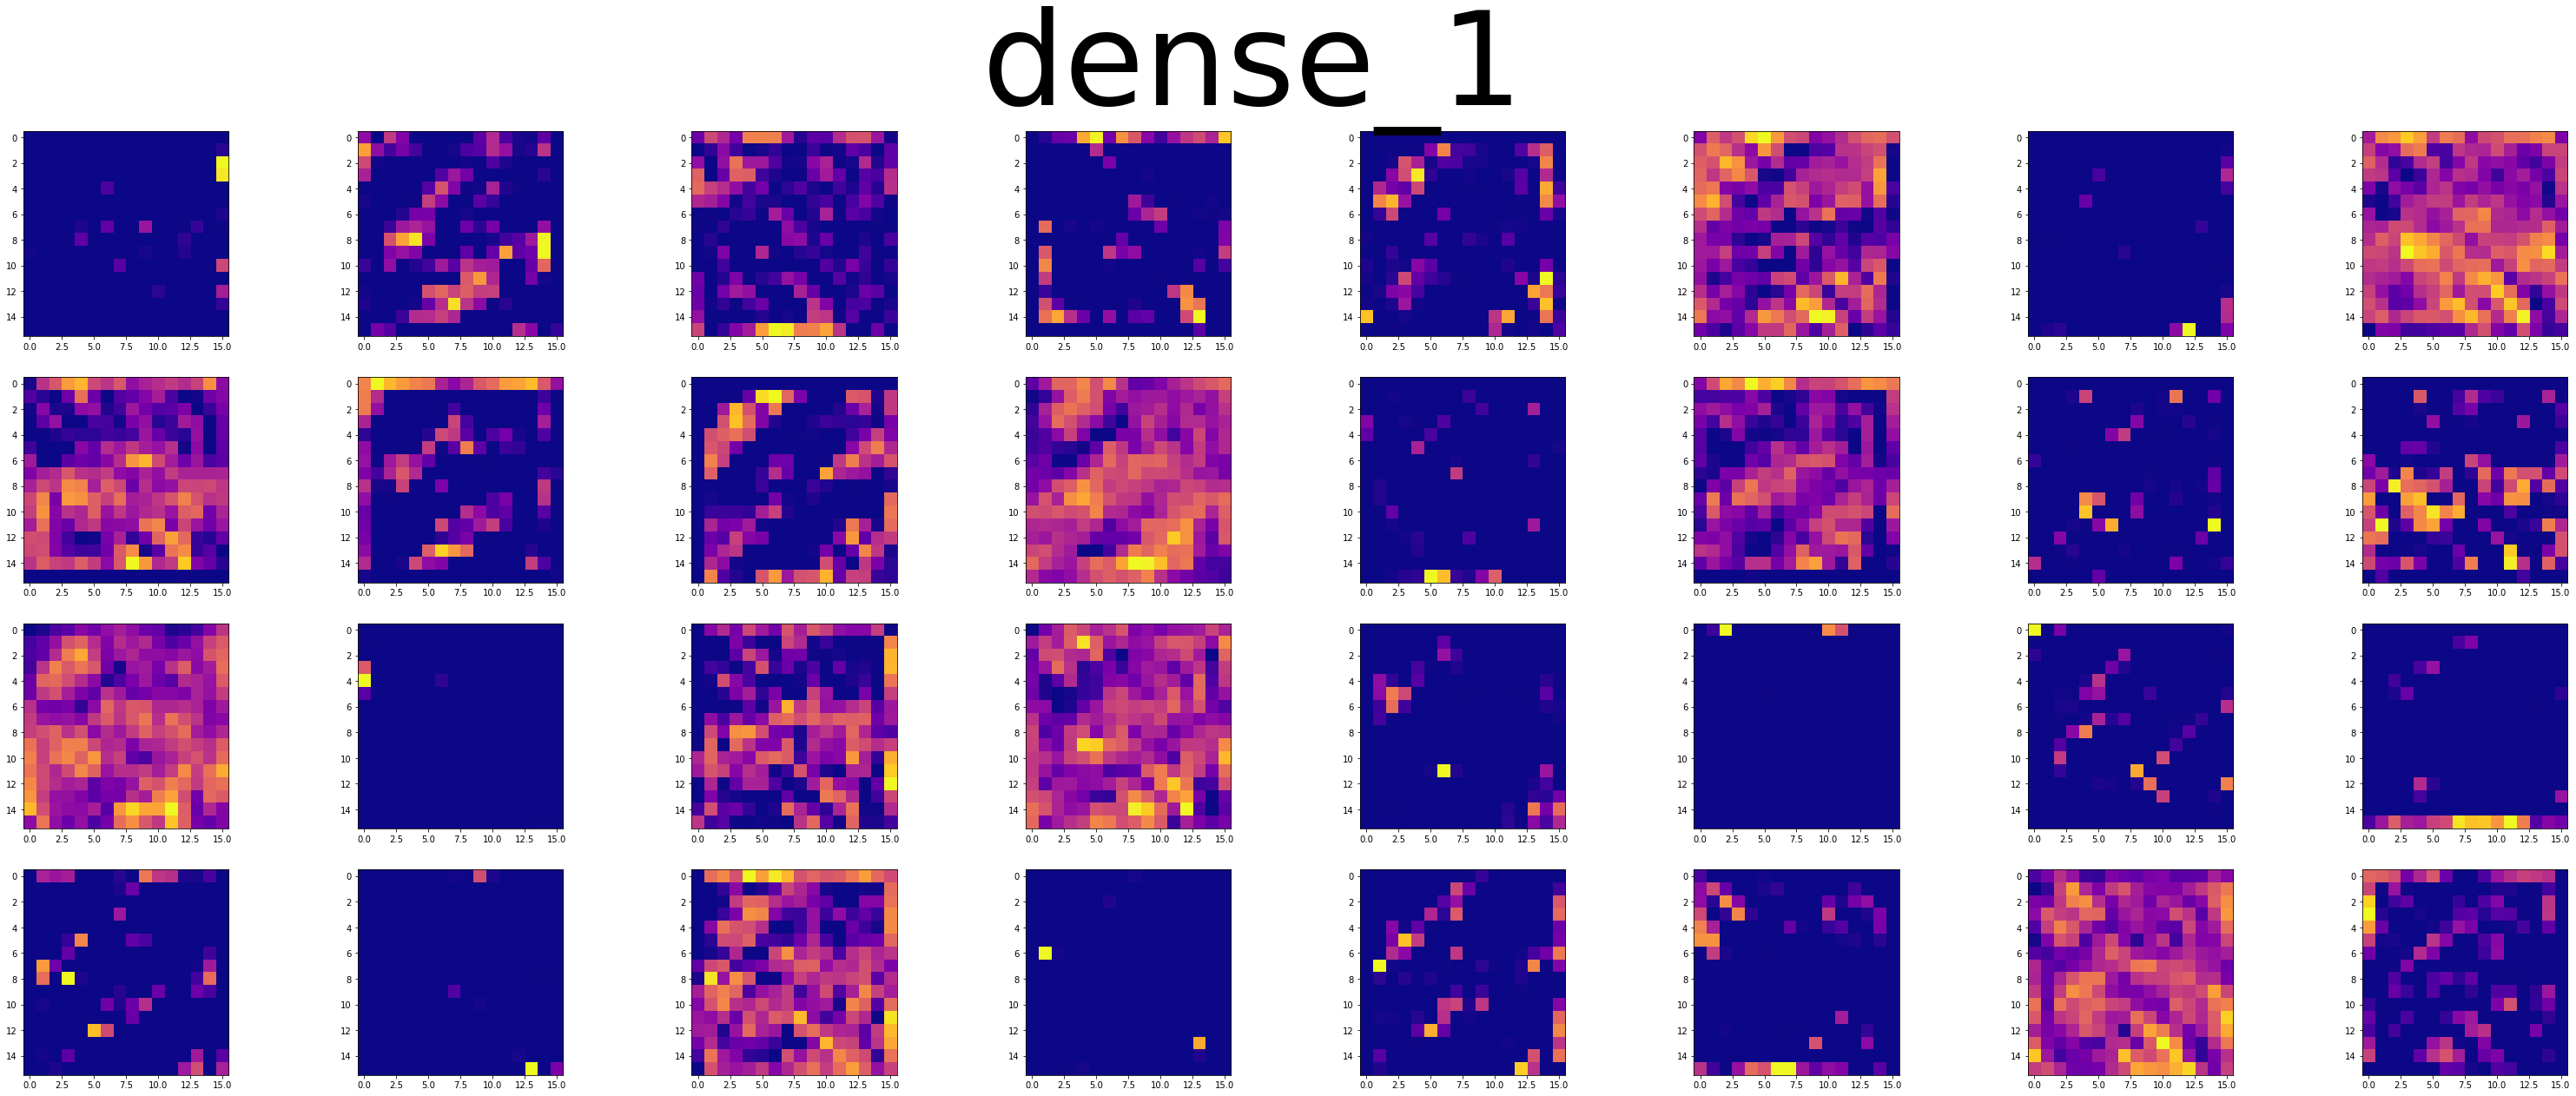

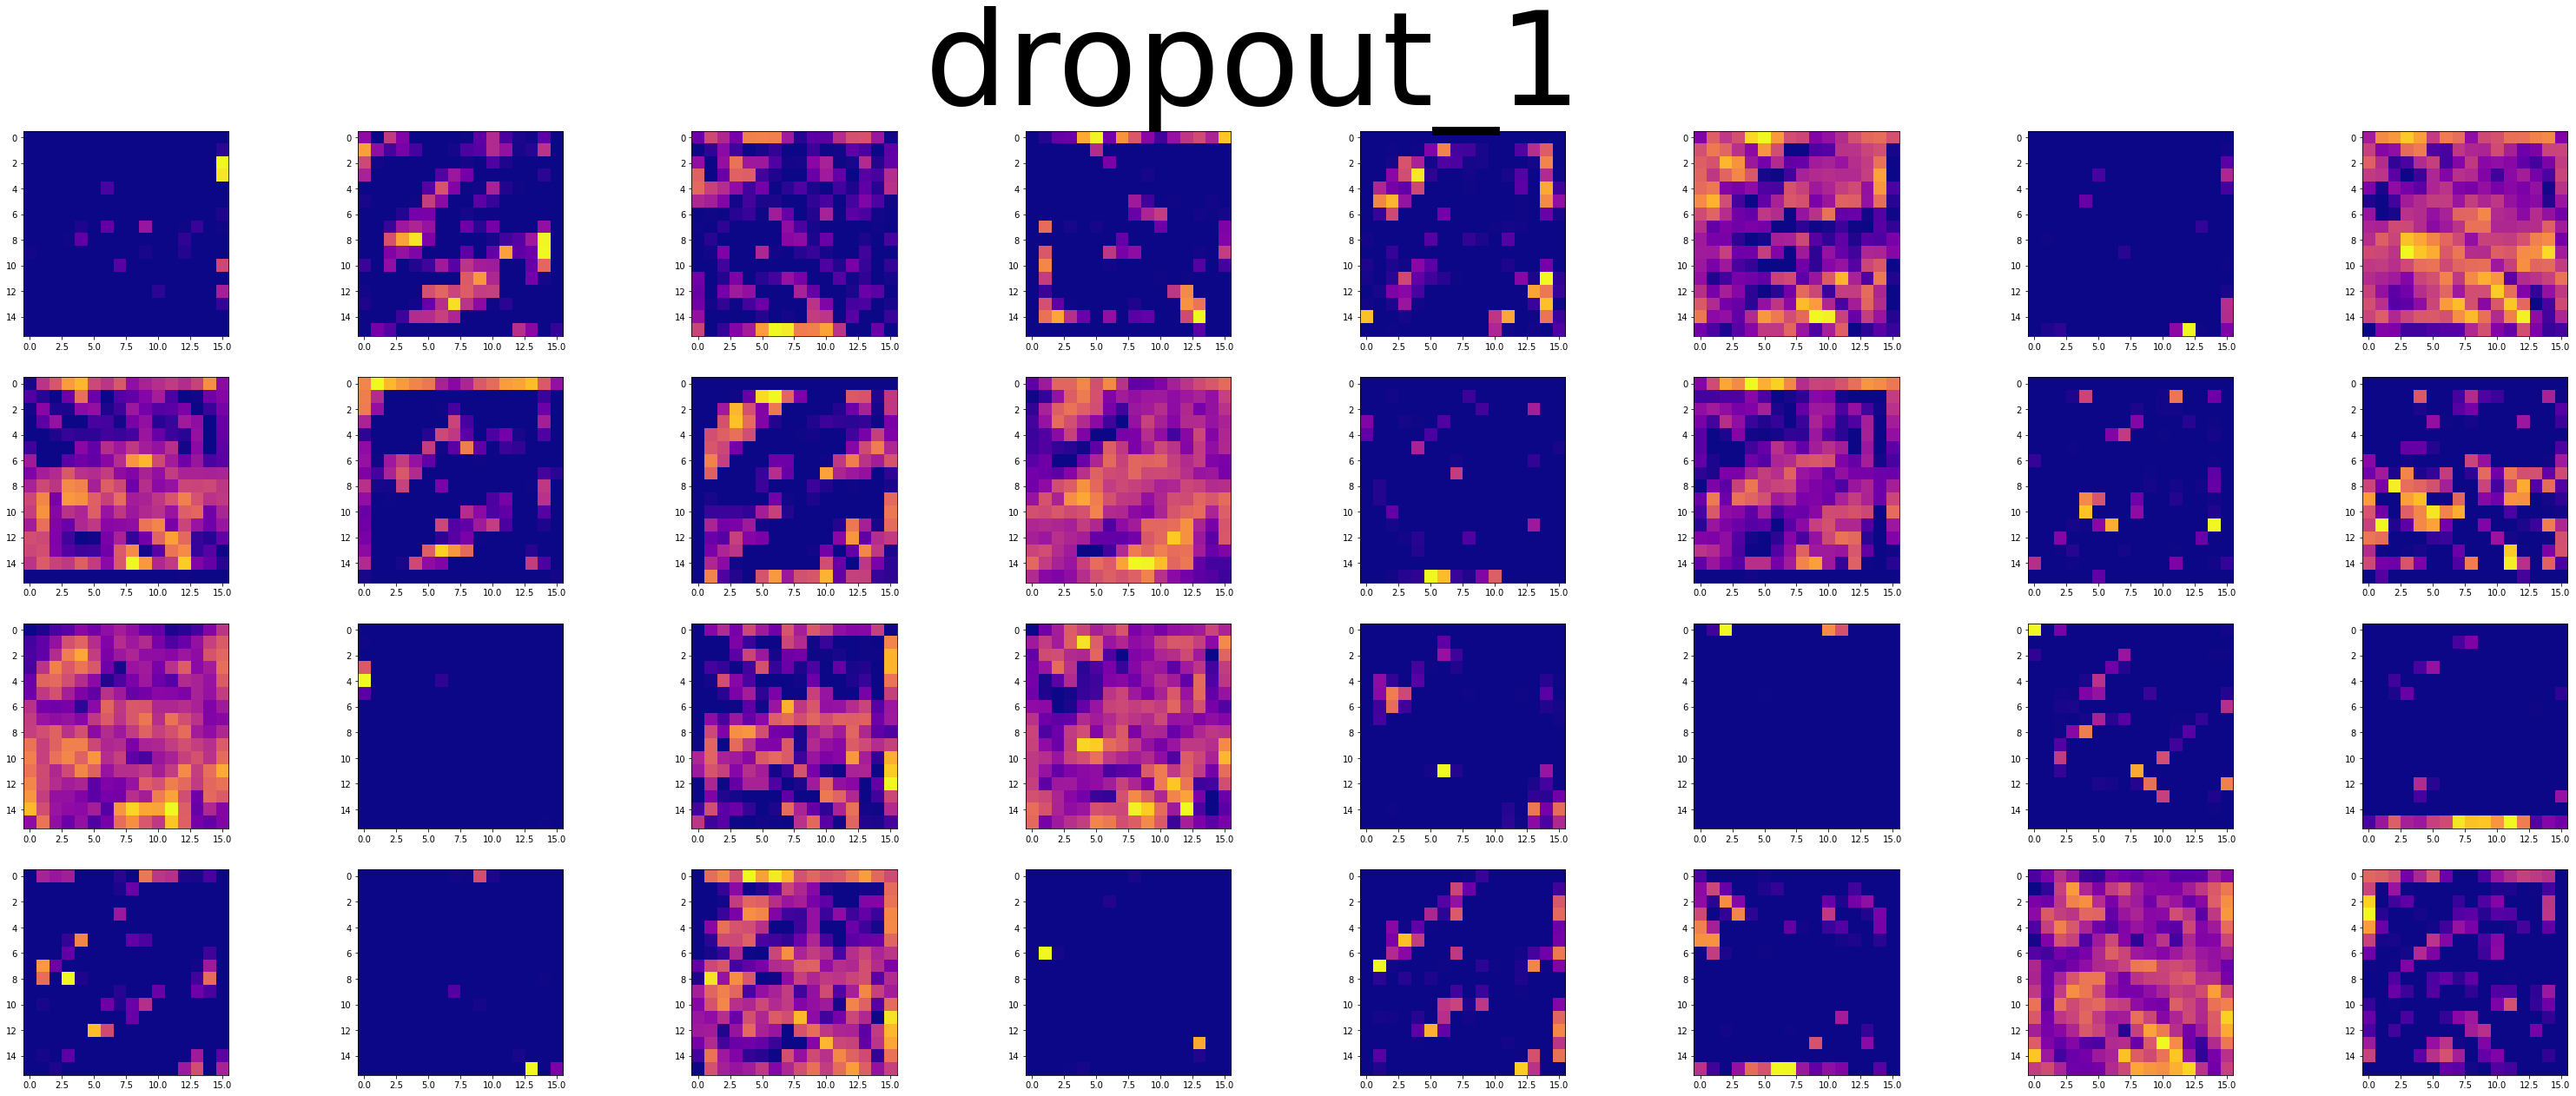

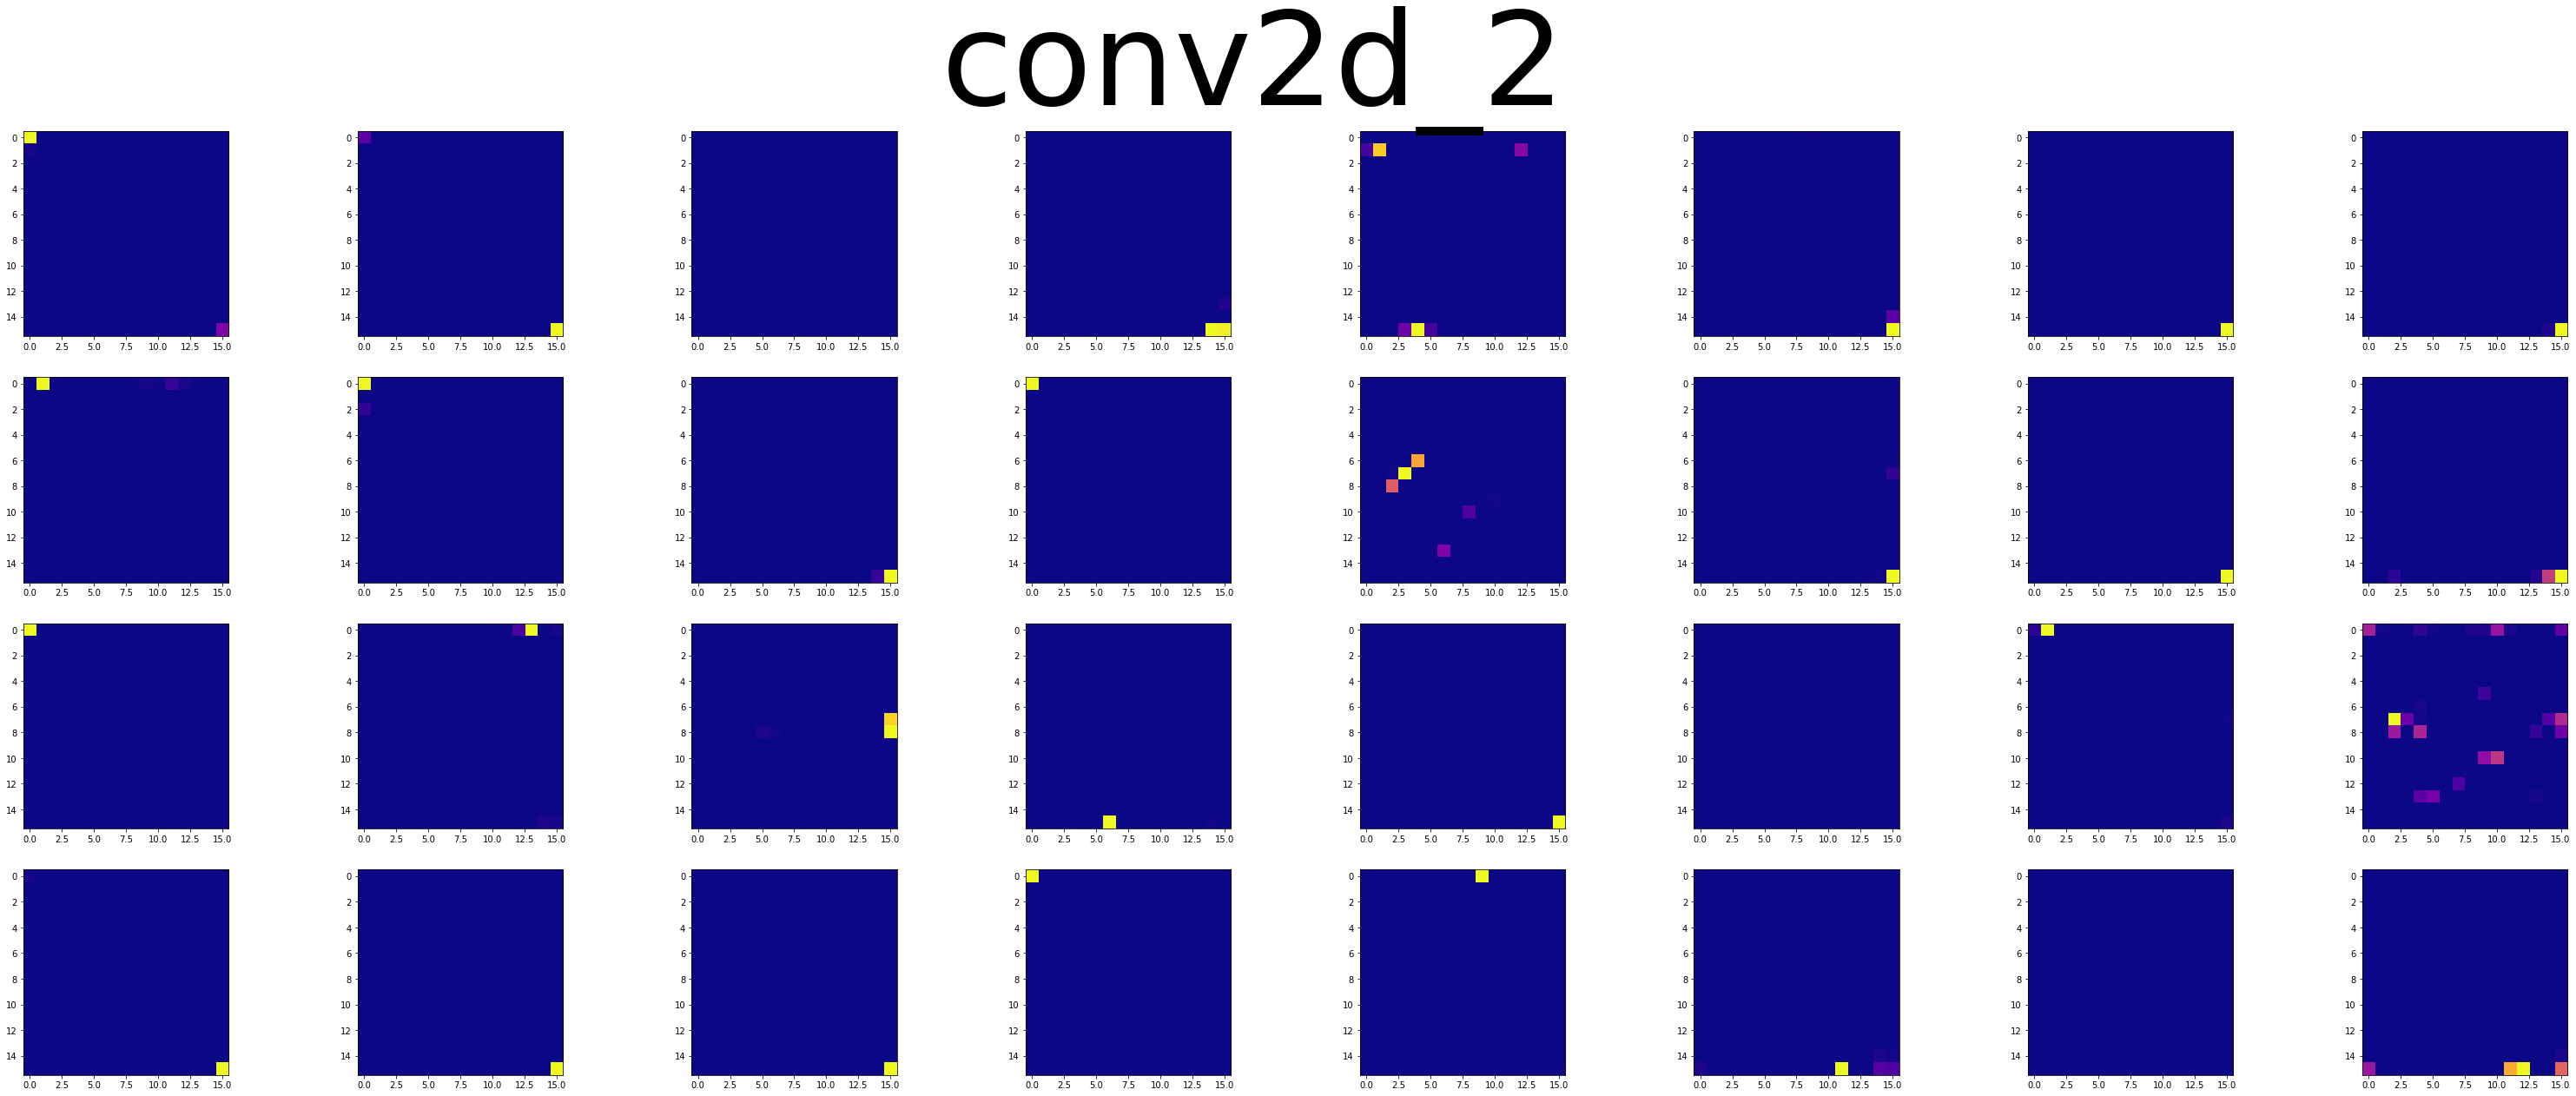

In [11]:
from modules.observation_modele import plot_layer

img = "../datas/RAW/train/bee/0103.png"
plt.imshow(plt.imread(img))

plot_layer(model, img, range(8))